# **<span style="color:#689f38;">Import the needed libraries</span>**


In [856]:
#General Imports

import os
import warnings
import sqlite3
from math import ceil
from itertools import product

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()
warnings.filterwarnings('ignore')

# Random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)



#Data Preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Improved Categorical Variable Visualizations
import matplotlib.ticker as ticker

#Feature Selection
# Filter Methods
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Wrapper Methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Embedded Methods
from sklearn.linear_model import LassoCV


#Modeling
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet
)

#Model Evaluation & Metrics
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    median_absolute_error,
    root_mean_squared_error,
    mean_absolute_percentage_error,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    roc_curve
)

from sklearn.model_selection import KFold, StratifiedKFold


# **<span style="color:#689f38;">Data Understanding  and Preparation</span>**


### **<span style="color:#689f38;">Data Loading & Initial Preparation</span>**


In [857]:
#importing dataset 
cars = pd.read_csv('cars.csv', sep = ',')
cars.head(3)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.0,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.0,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.0,0.0


In [858]:
#importing test dataset
cars_test = pd.read_csv('test.csv', sep=',')
cars_test.head()

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


**<span style="color:#8bc34a;">Dataset Metadata</span>**

Below is a brief description of each variable available in the dataset:

- **carID** → Unique identifier for each car in the dataset.

- **Brand** → The main brand or manufacturer of the car (e.g., Ford, Toyota, BMW, Audi...).

- **model** → The specific model name of the car (e.g., Fiesta, A3, Corolla...).

- **year** → The year when the car was registered.

- **mileage** → The total distance the car has travelled, measured in miles.

- **tax** → The annual road tax (in £) applicable to the car in 2020.

- **fuelType** → The type of fuel used by the car (e.g., Petrol, Diesel, Hybrid, Electric).

- **mpg** → The average miles per gallon (fuel efficiency of the car).

- **engineSize** → The size of the engine in liters (cubic decimeters).

- **paintQuality%** → The mechanic’s assessment (in percentage) of the car’s paint quality and hull integrity.

- **previousOwners** → The number of previous registered owners of the car.

- **hasDamage** → Boolean flag indicating whether the car was reported as damaged by the seller (True/False).

- **price** → Target variable — the purchase price of the car by *Cars 4 You* (in £).


**<span style="color:#8bc34a;">General Inspection</span>**

In [859]:
cars.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [860]:
cars.describe(include='all').T #Get basic summary statistics

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carID,75973.0,NaN,NaN,NaN,37986.0,21931.660338,0.0,18993.0,37986.0,56979.0,75972.0
Brand,74452,72,Ford,14808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,74456,735,Focus,6353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,74482.0,NaN,NaN,NaN,2017.096611,2.208704,1970.0,2016.0,2017.0,2019.0,2024.121759
price,75973.0,NaN,NaN,NaN,16881.889553,9736.926322,450.0,10200.0,14699.0,20950.0,159999.0
transmission,74451,40,Manual,38050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,74510.0,NaN,NaN,NaN,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.0
fuelType,74462,34,Petrol,37995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,68069.0,NaN,NaN,NaN,120.329078,65.521176,-91.12163,125.0,145.0,145.0,580.0
mpg,68047.0,NaN,NaN,NaN,55.152666,16.497837,-43.421768,46.3,54.3,62.8,470.8


In [861]:
cars.shape

(75973, 14)

In [862]:
cars.info() #more summary overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [863]:
cars.dtypes #checking data types

carID               int64
Brand              object
model              object
year              float64
price               int64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage         float64
dtype: object

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">
  <strong>Data Cleaning & Validation Checklist</strong>

- **Check for misspelled values** and correct them (e.g., 'anual' → 'manual'), applies to categorical columns such as 'transmission' and 'fuelType'  

- **Verify and correct negative values** in numeric features (e.g., 'previousOwners' should not be negative)

- **Convert data types** to appropriate formats (e.g., integers, floats, booleans, datetime where needed)

- **Inspect and handle missing values (NaNs)** appropriately (decide whether to fill, drop, or impute) 

- **Explore multivariate relationships**, such as between 'tax' and 'year' (check correlations or visual relationships between variables)

- **Validate boolean variables** to ensure they contain only '0' and '1' (e.g., 'hasDamage' column)  


### **<span style="color:#689f38;"> Data Cleaning & Quality Assessment</span>**


In [864]:
cars.set_index('carID', inplace=True) #setting carID as index

In [865]:
cars_test.set_index('carID', inplace=True)

In [866]:
cars_test.head()

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [867]:
cars.head()

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


**<span style="color:#8bc34a;">Checking for missing values</span>**


In [868]:
cars.isnull().sum()

Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

In [869]:
cars_test.isnull().sum()

Brand              649
model              650
year               653
transmission       623
mileage            689
fuelType           656
tax               3308
mpg               3288
engineSize         628
paintQuality%      625
previousOwners     597
hasDamage          597
dtype: int64

**<span style="color:#8bc34a;">Identify and display all duplicated rows in dataset</span>**


In [870]:
#Show all rows that are part of a duplicated group (both original and duplicate)
duplicates_full = cars[cars.duplicated(keep=False)]

#Sort by something meaningful (e.g., carID) so duplicates appear together
duplicates_full = duplicates_full.sort_values(by=list(cars.columns))

#Display the duplicated rows
duplicates_full

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
23477,Ford,Focus,2017.0,14000,Automatic,9137.0,Petrol,NaN,NaN,1.0,48.0,4.0,0.0
25766,Ford,Focus,2017.0,14000,Automatic,9137.0,Petrol,NaN,NaN,1.0,48.0,4.0,0.0
15152,Ford,Focus,2018.0,13500,Manual,11382.0,Petrol,NaN,NaN,1.0,57.0,4.0,0.0
21404,Ford,Focus,2018.0,13500,Manual,11382.0,Petrol,NaN,NaN,1.0,57.0,4.0,0.0
33774,Hyundai,I10,2017.0,7500,Manual,NaN,Petrol,145.0,57.7,1.2,32.0,4.0,0.0
34128,Hyundai,I10,2017.0,7500,Manual,NaN,Petrol,145.0,57.7,1.2,32.0,4.0,0.0
33890,Hyundai,Ioniq,2019.0,23991,Automatic,5500.0,Hybrid,135.0,78.5,1.6,39.0,3.0,0.0
34301,Hyundai,Ioniq,2019.0,23991,Automatic,5500.0,Hybrid,135.0,78.5,1.6,39.0,3.0,0.0


In [871]:
cars.drop_duplicates(inplace=True) #dropping duplicated lines 

**<span style="color:#8bc34a;">Coherence variable check</span>**

In [872]:
cars.rename(columns={'Brand': 'brand'}, inplace=True)
cars_test.rename(columns={'Brand': 'brand'}, inplace=True)

In [873]:
non_metric_features = ["brand", "model", "transmission", "fuelType","hasDamage"]
metric_features = cars.columns.drop(non_metric_features).to_list()

non_metric_features_test = ["brand", "model", "transmission", "fuelType","hasDamage"]
metric_features_test = cars_test.columns.drop(non_metric_features_test).to_list()


<span style="color:#8bc34a;">Metric features</span>

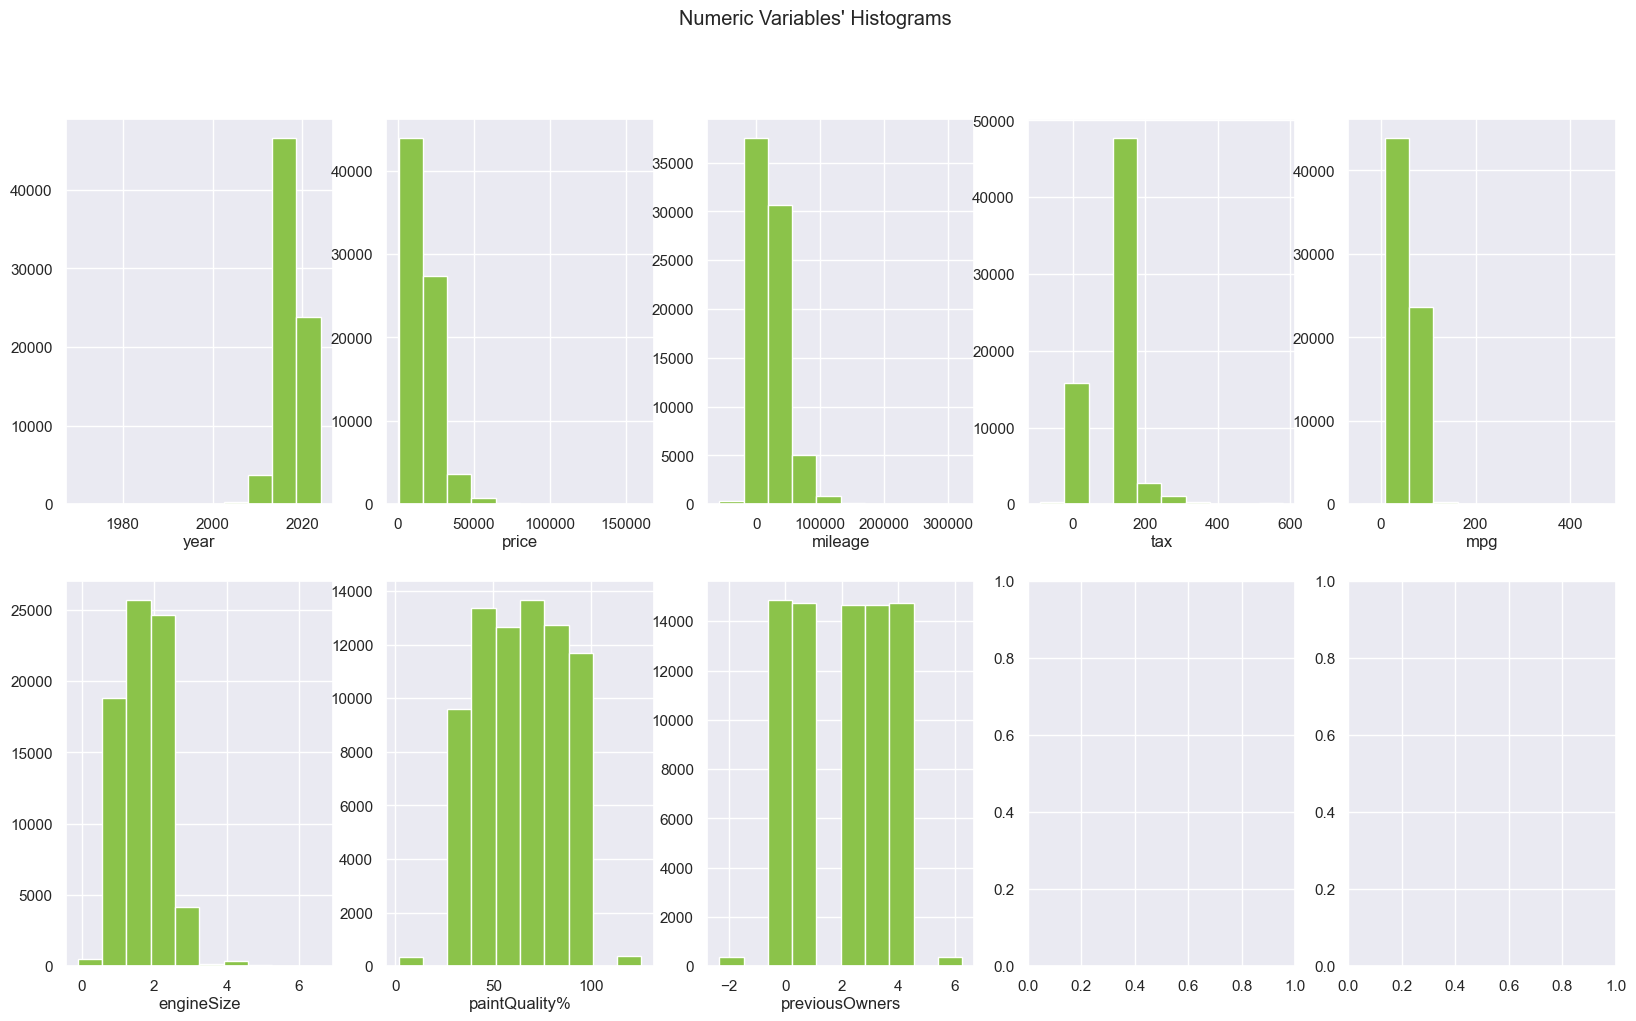

In [874]:
#Plot Numeric Variables' Histograms 

sns.set() 
sp_rows = 2
sp_cols = 5



fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(cars[feat], color='#8bc34a')
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    os.makedirs(os.path.join('..', 'figures', 'eda'))
    
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

plt.show()

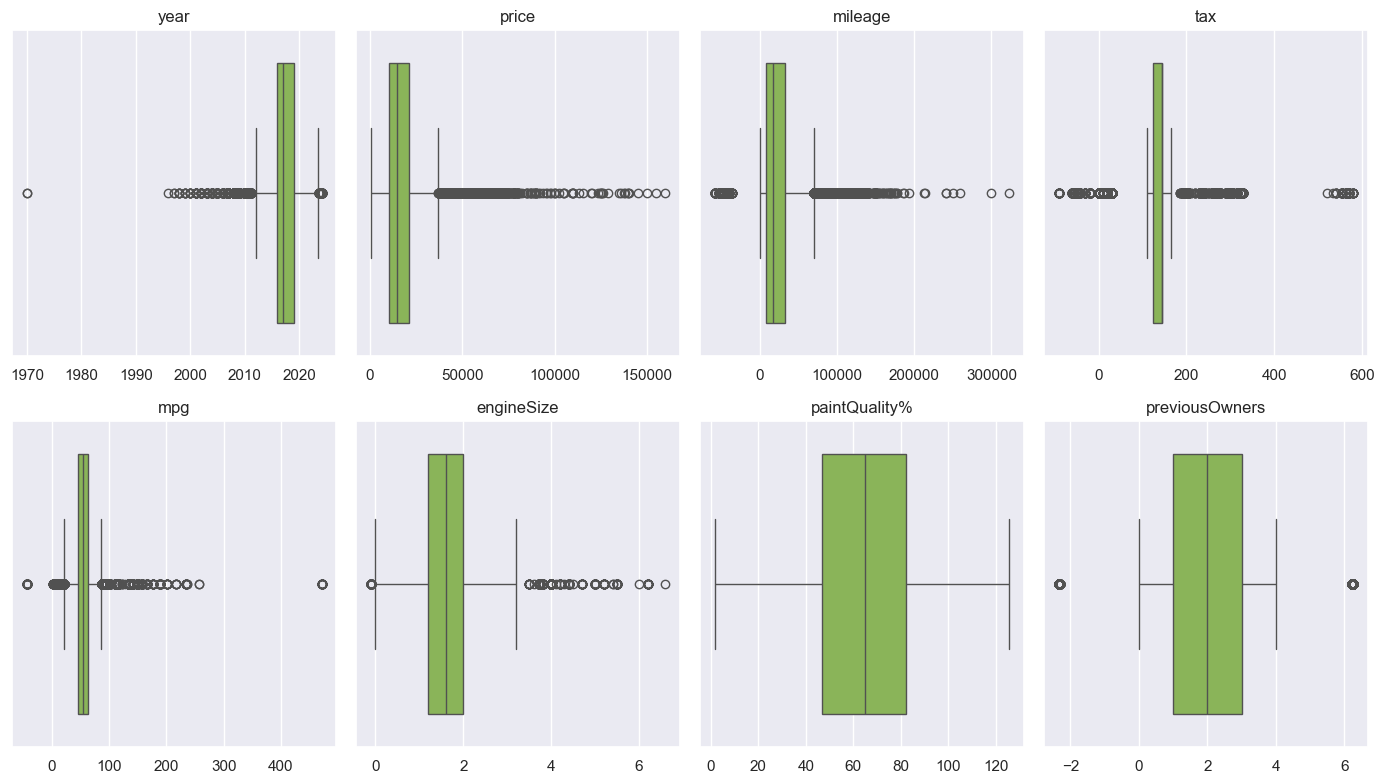

In [875]:
#Set up the figure size
plt.figure(figsize=(14, 8))

#Create one boxplot per variable
for i, col in enumerate(metric_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=cars[col], color='#8bc34a')
    plt.title(col)
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

Most num features are skewed, and most num features have outliers, we should apply transformations and treat them later on.


<Axes: >

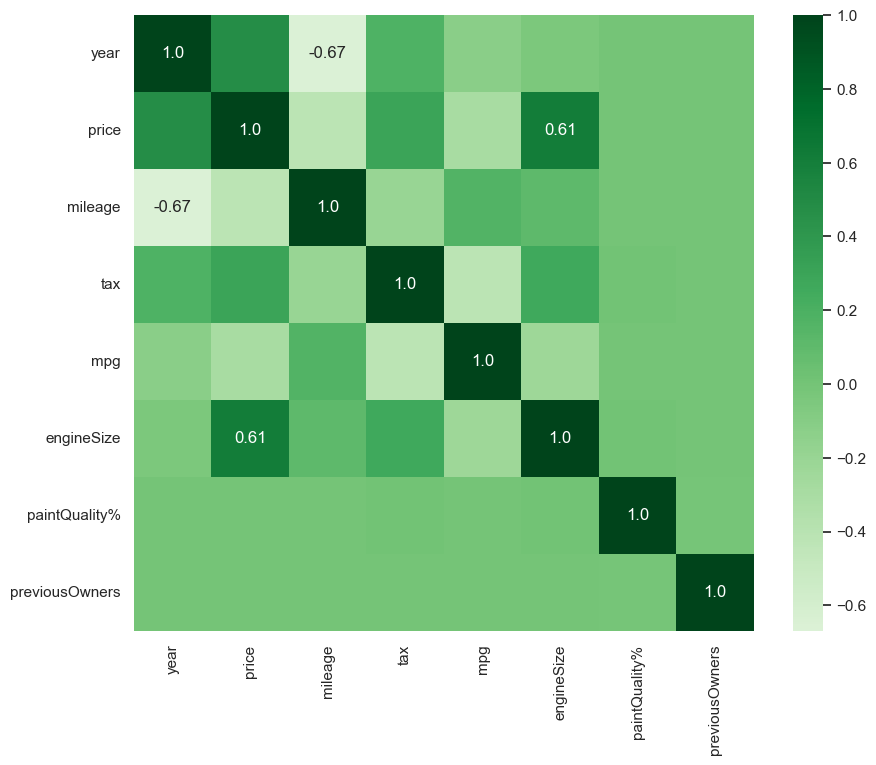

In [876]:
corr= cars[metric_features].corr(method="pearson")
corr= corr.round(2)


mask_annot = np.absolute(corr.values) >= 0.5

annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

fig = plt.figure(figsize=(10, 8))

sns.heatmap(data=corr, annot=annot, fmt="", center=0,cmap='Greens')

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

Not a lot of correlated relationships between features.


<span style="color:#8bc34a;">Categorical Features - Clean and standardize categorical variables</span>

In [877]:
cars['brand'].unique()

array(['VW', 'Toyota', 'Audi', 'Ford', 'BMW', 'Skoda', 'Opel', 'Mercedes',
       'FOR', 'mercedes', 'Hyundai', 'w', 'ord', 'MW', 'bmw', nan,
       'yundai', 'BM', 'Toyot', 'udi', 'Ope', 'AUDI', 'V', 'opel', 'pel',
       'For', 'pe', 'Mercede', 'audi', 'MERCEDES', 'OPEL', 'koda', 'FORD',
       'Hyunda', 'W', 'Aud', 'vw', 'hyundai', 'skoda', 'ford', 'TOYOTA',
       'ercedes', 'oyota', 'toyota', 'SKODA', 'Skod', 'HYUNDAI', 'kod',
       'v', 'for', 'SKOD', 'aud', 'KODA', 'PEL', 'yunda', 'or', 'UDI',
       'OYOTA', 'HYUNDA', 'mw', 'OPE', 'mercede', 'ERCEDES', 'ercede',
       'TOYOT', 'MERCEDE', 'ORD', 'ud', 'ope', 'AUD', 'hyunda', 'skod',
       'toyot'], dtype=object)

In [878]:
# Convert all to lowercase and strip spaces
cars['brand'] = cars['brand'].str.lower().str.strip()


# Define mapping: wrong spellings → correct brand names
brand_map = {
    # Volkswagen
    'vw': 'Volkswagen', 'v': 'Volkswagen', 'w': 'Volkswagen',
    
    # Toyota
    'toyot': 'Toyota', 'oyota': 'Toyota', 'toyota': 'Toyota', 'oyot': 'Toyota', 'toyo': 'Toyota',
    
    # Ford
    'for': 'Ford', 'ord': 'Ford', 'ford': 'Ford', 'fro': 'Ford', 'or': 'Ford',
    
    # Audi
    'aud': 'Audi', 'audi': 'Audi', 'udi': 'Audi', 'audii': 'Audi', 'ud': 'Audi',
    
    # BMW
    'bm': 'BMW', 'mw': 'BMW', 'bmw': 'BMW', 'bw': 'BMW',
    
    # Mercedes
    'mercede': 'Mercedes', 'mercedes': 'Mercedes', 'ercedes': 'Mercedes', 'erce': 'Mercedes',
    'erc': 'Mercedes', 'ercee': 'Mercedes', 'ercede': 'Mercedes',
    
    # Hyundai
    'hyundai': 'Hyundai', 'hyunda': 'Hyundai', 'yundai': 'Hyundai', 'yunda': 'Hyundai',
    
    # Opel
    'opel': 'Opel', 'ope': 'Opel', 'pel': 'Opel', 'pe': 'Opel',
    
    # Skoda
    'skoda': 'Skoda', 'skod': 'Skoda', 'koda': 'Skoda', 'kod': 'Skoda',

    # NaN (optional placeholder for missing values)
    'nan': 'Unknown'
}

# Clean data
cars['brand'] = cars['brand'].replace(brand_map)
cars['brand'] = cars['brand'].str.title() #first letter upercase
print(sorted(cars['brand'].dropna().unique()))



['Audi', 'Bmw', 'Ford', 'Hyundai', 'Mercedes', 'Opel', 'Skoda', 'Toyota', 'Volkswagen']


In [879]:
"""For the test dataset as well:"""
# Convert all to lowercase and strip spaces
cars_test['brand'] = cars_test['brand'].str.lower().str.strip()
# Clean data
cars_test['brand'] = cars_test['brand'].replace(brand_map)
cars_test['brand'] = cars_test['brand'].str.title() #first letter upercase

In [880]:
#Normalize text (lowercase + strip)
cars['model'] = cars['model'].str.lower().str.strip()

#Define mapping of wrong or partial spellings → correct names
model_map = {
    # Ford
    'focus': 'Focus', 'focu': 'Focus',
    'fiesta': 'Fiesta', 'fiest': 'Fiesta',
    'mondeo': 'Mondeo', 'monde': 'Mondeo',
    'kuga': 'Kuga', 'kug': 'Kuga',
    'ka': 'Ka', 'ka+': 'Ka+',
    'ecosport': 'EcoSport', 'ecospor': 'EcoSport',
    'b-max': 'B-MAX', 'b-ma': 'B-MAX',
    'c-max': 'C-MAX', 'c-ma': 'C-MAX',
    's-max': 'S-MAX', 's-ma': 'S-MAX',
    'tourneo connect': 'Tourneo Connect', 'tourneo custom': 'Tourneo Custom',
    'grand c-max': 'Grand C-MAX', 'grand tourneo connect': 'Grand Tourneo Connect',

    # VW
    'golf': 'Golf', 'golf s': 'Golf', 'gol': 'Golf',
    'passat': 'Passat', 'passa': 'Passat',
    'tiguan': 'Tiguan', 'tigua': 'Tiguan',
    'touareg': 'Touareg', 'touare': 'Touareg',
    't-roc': 'T-Roc', 't-ro': 'T-Roc',
    't-cross': 'T-Cross', 't-cros': 'T-Cross',
    'touran': 'Touran', 'toura': 'Touran',
    'caddy': 'Caddy', 'caddy maxi': 'Caddy Maxi', 'caddy life': 'Caddy Life',
    'arteon': 'Arteon', 'arteo': 'Arteon',
    'sharan': 'Sharan', 'shara': 'Sharan',
    'amarok': 'Amarok',
    'scirocco': 'Scirocco', 'scirocc': 'Scirocco',
    'beetle': 'Beetle', 'beetl': 'Beetle',
    'caravelle': 'Caravelle', 'caravell': 'Caravelle',
    'up': 'Up',

    # BMW
    '1 series': '1 Series', '1 serie': '1 Series',
    '2 series': '2 Series', '2 serie': '2 Series',
    '3 series': '3 Series', '3 serie': '3 Series',
    '4 series': '4 Series', '4 serie': '4 Series',
    '5 series': '5 Series', '5 serie': '5 Series',
    '6 series': '6 Series', '6 serie': '6 Series',
    '7 series': '7 Series', '7 serie': '7 Series',
    '8 series': '8 Series', '8 serie': '8 Series',
    'm3': 'M3', 'm4': 'M4', 'm5': 'M5', 'm6': 'M6',
    'z3': 'Z3', 'z4': 'Z4',
    'x1': 'X1', 'x2': 'X2', 'x3': 'X3', 'x4': 'X4', 'x5': 'X5', 'x6': 'X6', 'x7': 'X7',

    # Mercedes
    'a class': 'A Class', 'a clas': 'A Class',
    'b class': 'B Class', 'b clas': 'B Class',
    'c class': 'C Class', 'c clas': 'C Class',
    'e class': 'E Class', 'e clas': 'E Class',
    's class': 'S Class', 's clas': 'S Class',
    'glc class': 'GLC Class', 'glc clas': 'GLC Class',
    'gle class': 'GLE Class', 'gle clas': 'GLE Class',
    'gla class': 'GLA Class', 'gla clas': 'GLA Class',
    'gl class': 'GL Class', 'glb class': 'GLB Class',
    'cls class': 'CLS Class', 'cls clas': 'CLS Class',
    'cla class': 'CLA Class', 'cla clas': 'CLA Class',
    'sl class': 'SL Class', 'sl clas': 'SL Class',
    'slk': 'SLK', 'clk': 'CLK', 'cl class': 'CL Class', 'cl clas': 'CL Class',
    'v class': 'V Class', 'v clas': 'V Class',
    'x-class': 'X-Class', 'x-clas': 'X-Class',

    # Audi
    'a1': 'A1', 'a2': 'A2', 'a3': 'A3', 'a4': 'A4', 'a5': 'A5',
    'a6': 'A6', 'a7': 'A7', 'a8': 'A8',
    'q2': 'Q2', 'q3': 'Q3', 'q5': 'Q5', 'q7': 'Q7', 'q8': 'Q8',
    'tt': 'TT', 's3': 'S3', 's4': 'S4', 'rs3': 'RS3', 'rs4': 'RS4', 'rs5': 'RS5', 'rs6': 'RS6', 'sq5': 'SQ5', 'sq7': 'SQ7',
    'r8': 'R8',

    # Toyota
    'yaris': 'Yaris', 'yari': 'Yaris',
    'aygo': 'Aygo', 'ayg': 'Aygo',
    'corolla': 'Corolla', 'coroll': 'Corolla',
    'rav4': 'RAV4', 'rav': 'RAV4',
    'c-hr': 'C-HR', 'c-h': 'C-HR',
    'auris': 'Auris', 'auri': 'Auris',
    'avensis': 'Avensis', 'avensi': 'Avensis',
    'prius': 'Prius',
    'camry': 'Camry',
    'verso': 'Verso', 'vers': 'Verso', 'proace verso': 'Proace Verso', 'verso-s': 'Verso-S',
    'supra': 'Supra',
    'land cruiser': 'Land Cruiser', 'land cruise': 'Land Cruiser', 'urban cruiser': 'Urban Cruiser',

    # Hyundai
    'i10': 'I10', 'i20': 'I20', 'i30': 'I30', 'i40': 'I40', 'i80': 'I80', 'i800': 'I800',
    'ioniq': 'Ioniq', 'ioni': 'Ioniq',
    'ix20': 'IX20', 'ix35': 'IX35', 'ix2': 'IX2',
    'kona': 'Kona', 'kon': 'Kona',
    'tucson': 'Tucson', 'tucso': 'Tucson', 'tucs': 'Tucson',
    'santa fe': 'Santa Fe', 'santa f': 'Santa Fe',

    # Opel
    'astra': 'Astra', 'astr': 'Astra',
    'corsa': 'Corsa', 'cors': 'Corsa',
    'insignia': 'Insignia', 'insigni': 'Insignia',
    'mokka': 'Mokka', 'mokka x': 'Mokka X', 'mokk': 'Mokka', 'mokka ': 'Mokka',
    'zafira': 'Zafira', 'zafir': 'Zafira', 'zafira tourer': 'Zafira Tourer',
    'meriva': 'Meriva', 'meriv': 'Meriva',
    'antara': 'Antara',
    'vectra': 'Vectra',
    'grandland x': 'Grandland X', 'grandland': 'Grandland X',
    'crossland x': 'Crossland X', 'crossland': 'Crossland X',
    'combo life': 'Combo Life', 'combo lif': 'Combo Life',
    'vivaro': 'Vivaro',
    'adam': 'Adam',
    'agila': 'Agila',
    'gtc': 'GTC', 'gt86': 'GT86', 'tigra': 'Tigra', 'ampera': 'Ampera', 'cascada': 'Cascada',

    # Skoda
    'octavia': 'Octavia', 'octavi': 'Octavia',
    'fabia': 'Fabia', 'fabi': 'Fabia',
    'superb': 'Superb', 'super': 'Superb',
    'karoq': 'Karoq', 'karo': 'Karoq',
    'kodiaq': 'Kodiaq', 'kodi': 'Kodiaq',
    'kamiq': 'Kamiq', 'kami': 'Kamiq',
    'scala': 'Scala', 'scal': 'Scala',
    'roomster': 'Roomster', 'roomste': 'Roomster',
    'yeti': 'Yeti', 'yeti outdoor': 'Yeti Outdoor', 'yeti outdoo': 'Yeti Outdoor',

    # Miscellaneous
    'mustang': 'Mustang',
    'edge': 'Edge',
    'fusion': 'Fusion',
    'puma': 'Puma',
    'hilux': 'Hilux', 'hilu': 'Hilux',
    'fox': 'Fox',
    'shuttle': 'Shuttle',
    'camry': 'Camry',
    'i3': 'I3', 'i8': 'I8',
}

# Replace using the dictionary
cars['model'] = cars['model'].replace(model_map)

#Capitalize properly for display
cars['model'] = cars['model'].str.title()

#Verify unique clean values
print(sorted(cars['model'].dropna().unique()))


['1 Series', '2 Series', '200', '220', '230', '3 Series', '4 Series', '5 Series', '6 Series', '7 Series', '8 Series', 'A', 'A Class', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'Accent', 'Ada', 'Adam', 'Agila', 'Amaro', 'Amarok', 'Ampera', 'Antara', 'Arteon', 'Astra', 'Auris', 'Avensis', 'Aygo', 'B Class', 'B-Max', 'Beetle', 'C Class', 'C-Hr', 'C-Max', 'Caddy', 'Caddy Life', 'Caddy Maxi', 'Caddy Maxi Lif', 'Caddy Maxi Life', 'California', 'Camry', 'Caravelle', 'Cascada', 'Cc', 'Citig', 'Citigo', 'Cl Class', 'Cla Class', 'Clc Class', 'Clk', 'Cls Class', 'Combo Life', 'Corolla', 'Corsa', 'Crossland X', 'E Class', 'Ecosport', 'Edg', 'Edge', 'Eos', 'Escort', 'Fabia', 'Fiesta', 'Focus', 'Fox', 'Fusion', 'G Class', 'Galax', 'Galaxy', 'Getz', 'Gl Class', 'Gla Class', 'Glb Class', 'Glc Class', 'Gle Class', 'Gls Clas', 'Gls Class', 'Golf', 'Golf Sv', 'Grand C-Ma', 'Grand C-Max', 'Grand Tourneo Connec', 'Grand Tourneo Connect', 'Grandland X', 'Gt86', 'Gtc', 'Hilux', 'I', 'I1', 'I10', 'I2', 

In [881]:
"""For the test dataset as well:"""
#Convert all to lowercase and strip spaces
cars_test['model'] = cars_test['model'].str.lower().str.strip()
#Clean data
cars_test['model'] = cars_test['model'].replace(model_map)
cars_test['model'] = cars_test['model'].str.title() #first letter upercase

In [882]:
cars['transmission'].unique()

array(['Semi-Auto', 'Manual', 'anual', 'Semi-Aut', 'Automatic', 'manual',
       nan, 'unknown', 'Manua', 'AUTOMATIC', 'MANUAL', 'semi-auto',
       ' Manual ', 'automatic', 'emi-Auto', 'SEMI-AUTO', 'SEMI-AUT',
       'Automati', 'ANUAL', 'utomatic', 'unknow', 'EMI-AUTO', 'manua',
       'anua', 'emi-Aut', 'MANUA', 'emi-auto', 'UTOMATIC', ' manual ',
       ' MANUAL ', 'UNKNOWN', 'nknown', 'automati', 'Other', 'semi-aut',
       ' Manual', 'AUTOMATI', 'utomati', 'Manual ', 'manual ', 'nknow'],
      dtype=object)

In [883]:
#Normalize text
cars['transmission'] = cars['transmission'].str.lower().str.strip()

#Define mapping of typos → correct labels
transmission_map = {
    #Manual
    'manual': 'Manual', 'manua': 'Manual', 'anual': 'Manual', 'anua': 'Manual',
    
    #Automatic
    'automatic': 'Automatic', 'automati': 'Automatic', 'utomatic': 'Automatic', 'utomat': 'Automatic', 'utomati': 'Automatic',
    
    #Semi-Auto
    'semi-auto': 'Semi-Auto', 'semi-aut': 'Semi-Auto', 'emi-auto': 'Semi-Auto', 'emi-aut': 'Semi-Auto',
    
    #Unknown
    'unknown': 'Unknown', 'unknow': 'Unknown', 'nknown': 'Unknown', 'nknow': 'Unknown', 'nknown': 'Unknown', 'nknown': 'Unknown',
    'nknown': 'Unknown', 'other': 'Unknown'
}

#Replace values
cars['transmission'] = cars['transmission'].replace(transmission_map)

#Convert to title case for presentation
cars['transmission'] = cars['transmission'].str.title()

#Double-check result
print(sorted(cars['transmission'].dropna().unique()))


['Automatic', 'Manual', 'Semi-Auto', 'Unknown']


In [884]:
"""For the test dataset as well:"""
#Convert all to lowercase and strip spaces
cars_test['transmission'] = cars_test['transmission'].str.lower().str.strip()
#Clean data
cars_test['transmission'] = cars_test['transmission'].replace(transmission_map)
cars_test['transmission'] = cars_test['transmission'].str.title() #first letter upercase

In [885]:
cars['fuelType'].unique()

array(['Petrol', 'Diesel', 'etrol', 'Hybrid', 'diesel', 'iesel', nan,
       'petrol', 'PETROL', 'Diese', 'Petro', 'DIESEL', 'petro', 'HYBRID',
       'ybri', 'Other', 'DIESE', 'Hybri', 'ETROL', 'ybrid', 'PETRO',
       'hybrid', 'IESEL', 'Electric', 'ther', 'iese', 'etro', 'ETRO',
       'diese', 'Othe', 'YBRID', 'HYBRI', 'OTHER', 'other', 'IESE'],
      dtype=object)

In [886]:
#Normalize text
cars['fuelType'] = cars['fuelType'].str.lower().str.strip()

#Define mapping for misspellings → correct values
fuel_map = {
    #Petrol
    'petrol': 'Petrol', 'petro': 'Petrol', 'etrol': 'Petrol', 'etro': 'Petrol', 'etro': 'Petrol', 'etro': 'Petrol',
    
    #Diesel
    'diesel': 'Diesel', 'diese': 'Diesel', 'dies': 'Diesel', 'iesel': 'Diesel', 'iese': 'Diesel', 'iese': 'Diesel', 'iese': 'Diesel', 'iese': 'Diesel', 'dies': 'Diesel',
    
    #Hybrid
    'hybrid': 'Hybrid', 'hybri': 'Hybrid', 'ybri': 'Hybrid', 'ybrid': 'Hybrid', 'hybri': 'Hybrid',
    
    #Electric
    'electric': 'Electric',
    
    #Other / Unknown
    'other': 'Other', 'othe': 'Other', 'ther': 'Other'
}

#Apply replacements
cars['fuelType'] = cars['fuelType'].replace(fuel_map)

#Convert to title case for presentation
cars['fuelType'] = cars['fuelType'].str.title()

#Check cleaned unique values
print(sorted(cars['fuelType'].dropna().unique()))


['Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol']


In [887]:
"""For the test dataset as well:"""
#Convert all to lowercase and strip spaces
cars_test['fuelType'] = cars_test['fuelType'].str.lower().str.strip()
#Clean data
cars_test['fuelType'] = cars_test['fuelType'].replace(fuel_map)
cars_test['fuelType'] = cars_test['fuelType'].str.title() #first letter upercase

<span style="color:#8bc34a;">Remove rows with missing 'year' values</span>

In [888]:
cars = cars.dropna(subset=['year'])
#for test dataset we will be filling the 'year' missing values with median and then return the int number
median_year_test = cars_test['year'].median()
cars_test['year'] = cars_test['year'].fillna(median_year_test)

<span style="color:#8bc34a;">Ensure numeric validity and correct data types</span>

In [889]:
# onvert negative values to positive (absolute value)
cars[metric_features] = cars[metric_features].abs()
cars['hasDamage'] = cars['hasDamage'].astype(bool)
cars['year'] = cars['year'].astype(int)

#Now for the test dataset
cars_test[metric_features_test] = cars_test[metric_features_test].abs()
cars_test['hasDamage'] = cars_test['hasDamage'].astype(bool)
cars_test['year'] = cars_test['year'].astype(int)

In [890]:
cars.dtypes

brand              object
model              object
year                int64
price               int64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage            bool
dtype: object

# **<span style="color:#689f38;">Data Preprocessing & Transformations</span>**


### **<span style="color:#689f38;"> Splitting Data</span>**


In [891]:
X = cars.drop(columns=['price'])
y = cars['price']

In [892]:
#Split the data: 70% for training, 30% for validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.3,        #30% for validation
    random_state=0,      #ensures reproducibility
    stratify=None         #not needed here since target is continuous
)

In [893]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

#Repeat for Validation

X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

#Repeat for Test
cars_test_num = cars_test.select_dtypes(include=np.number).set_index(cars_test.index)
cars_test_cat = cars_test.select_dtypes(exclude=np.number).set_index(cars_test.index)


### **<span style="color:#689f38;"> Handling Missing Values</span>**


**<span style="color:#8bc34a;">Fill missing numeric values in training set with KNN and median</span>**

In [894]:
#Columns that will be filled using KNN
col_KNN = ['tax', 'mpg']

#1. Fill 'tax' and 'mpg' using KNN
imputer = KNNImputer(n_neighbors=5)  # Initialize KNN Imputer with 5 neighbors

#Apply KNN for the selected columns
X_train_num[col_KNN] = imputer.fit_transform(X_train_num[col_KNN])  # Fit on training data
X_val_num[col_KNN] = imputer.transform(X_val_num[col_KNN])  # Apply transformation to validation data
cars_test_num[col_KNN] = imputer.transform(cars_test_num[col_KNN])  # Apply transformation to test data

#2. Fill all other numeric columns with the median
#2.1 List the other columns (excluding 'tax' and 'mpg')
columns_to_fill = [col for col in X_train_num.columns if col not in col_KNN]  # Exclude KNN columns

#Loop through all the remaining columns and fill NaN values with the median
for column in columns_to_fill:
    median_to_fill = X_train_num[column].median()  # Calculate the median of the training set
    median_test = cars_test_num[column].median()  # Calculate the median of the test set
    
    #Fill missing values in training, validation, and test datasets with their respective medians
    X_train_num[column] = X_train_num[column].fillna(median_to_fill)
    X_val_num[column] = X_val_num[column].fillna(median_to_fill)
    cars_test_num[column] = cars_test_num[column].fillna(median_test)



<span style="color:#8bc34a;">Adjusting Data Types after filling the missing values</span>

In [895]:
X_train_num['previousOwners'] = X_train_num['previousOwners'].astype('int64')
X_val_num['previousOwners'] = X_val_num['previousOwners'].astype('int64')
cars_test_num['previousOwners'] =cars_test_num['previousOwners'].astype('int64')

In [896]:
X_train.dtypes

brand              object
model              object
year                int64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage            bool
dtype: object

**<span style="color:#8bc34a;">Fill missing categorical values in training set with mode</span>**

In [897]:
#Fill NaNs with mode for each categorical feature
for col in X_train_cat.columns:
    mode_value = X_train_cat[col].mode()[0]  #Get the most frequent value (mode)
    mode_value_test = cars_test_cat[col].mode()[0]
    X_train_cat[col] = X_train_cat[col].fillna(mode_value)  #Fill in the training data
    X_val_cat[col] = X_val_cat[col].fillna(mode_value)  #Fill in the validation data
    cars_test_cat[col] = cars_test_cat[col].fillna(mode_value_test)#Fill in the test data

### **<span style="color:#689f38;">Outliers Treatment</span>**


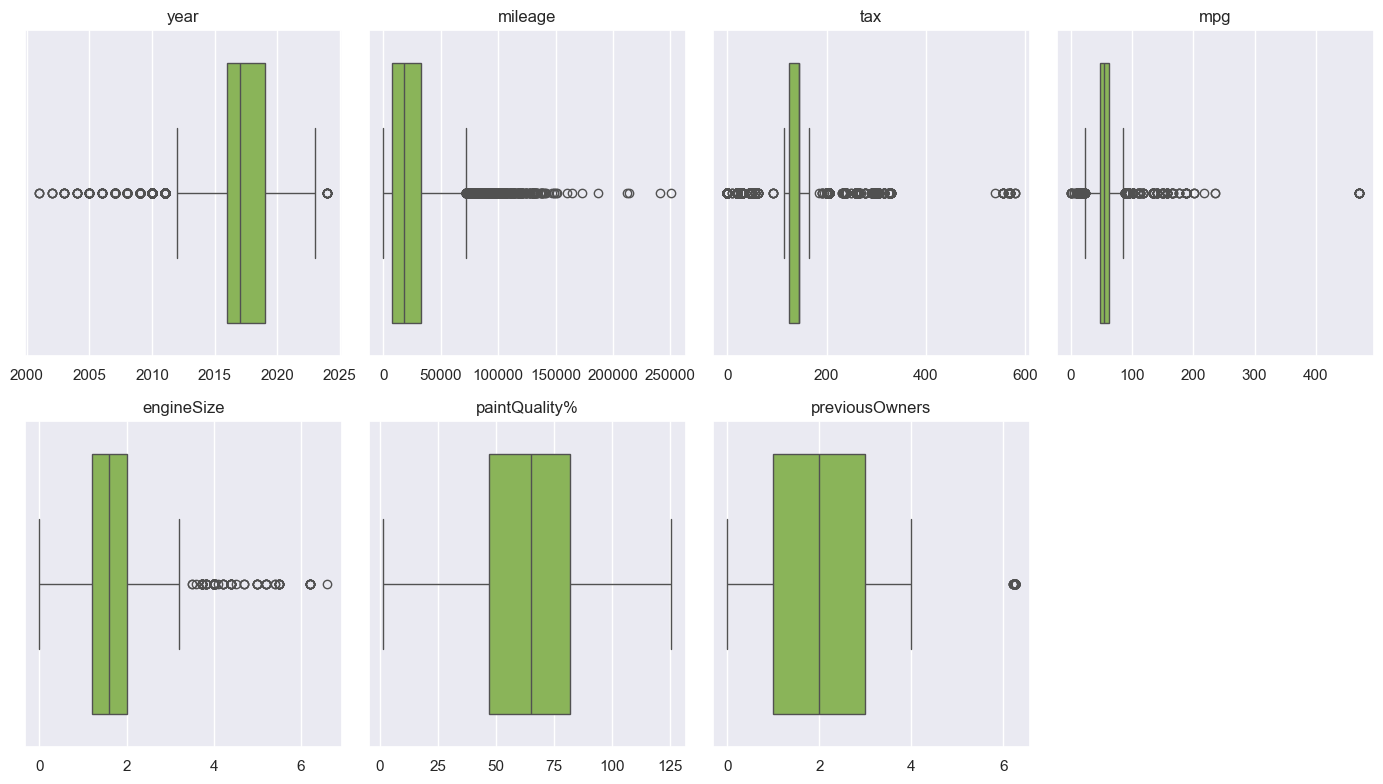

In [898]:
#Set up the figure size
plt.figure(figsize=(14, 8))

#Create one boxplot per variable
for i, col in enumerate(X_train_num, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=X_val[col], color='#8bc34a')
    plt.title(col)
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

From the boxplots, we notice that most numerical features have outliers. We are dealing with them below.


<span style="color:#8bc34a;">IQR-based Winsorizing (clipping )</span>


<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

We are applying this method for the features that have the most visually outliers, using clipping as a choice because if we were to remove, for example, the outlier we would lose a lot of data. 

In [899]:
#Clipping function using IQR
def clip_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)  
    Q3 = df[feature].quantile(0.75)  
    IQR = Q3 - Q1 

    #Upper and lower limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df[feature] = df[feature].clip(lower=lower_limit, upper=upper_limit)

X_train_num = X_train_num.copy()
X_val_num = X_val_num.copy()
cars_test_num = cars_test_num.copy()


clip_outliers(X_train_num, 'tax')
clip_outliers(X_val_num, 'tax')
clip_outliers(cars_test_num, 'tax')

clip_outliers(X_train_num, 'mpg')
clip_outliers(X_val_num, 'mpg')
clip_outliers(cars_test_num, 'mpg')

clip_outliers(X_train_num, 'mileage')
clip_outliers(X_val_num, 'mileage')
clip_outliers(cars_test_num, 'mileage')

clip_outliers(X_train_num, 'engineSize')
clip_outliers(X_val_num, 'engineSize')
clip_outliers(cars_test_num, 'engineSize')




<span style="color:#8bc34a;">Winsorizing (Manually)</span>


<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

For the feature **year**, manually winsorizing was the best option, since after trying to use other methods, we came to the conclusion that a lot of data in validation set was lost. This could have happen because when dropping the rows with outliers from the train on the validation, the propotion of those values in the val set is bigger than in the train set (because of the splitting) so we would be dropping a lot of data.

In [900]:
print((X_train_num['year']<2000).value_counts())

year_w = X_train_num['year'].copy()
year_w.loc[year_w<2000] = 2000

X_train_num['year'] = year_w

year
False    52119
True        15
Name: count, dtype: int64


In [901]:
print((X_val_num['year']<2000).value_counts())

year_w = X_val_num['year'].copy()
year_w.loc[year_w<2000] = 2000

X_val_num['year'] = year_w

year
False    22344
Name: count, dtype: int64


In [902]:
print((cars_test['year']<2000).value_counts())

year_w = cars_test['year'].copy()
year_w.loc[year_w<2000] = 2000

cars_test['year'] = year_w

year
False    32559
True         8
Name: count, dtype: int64


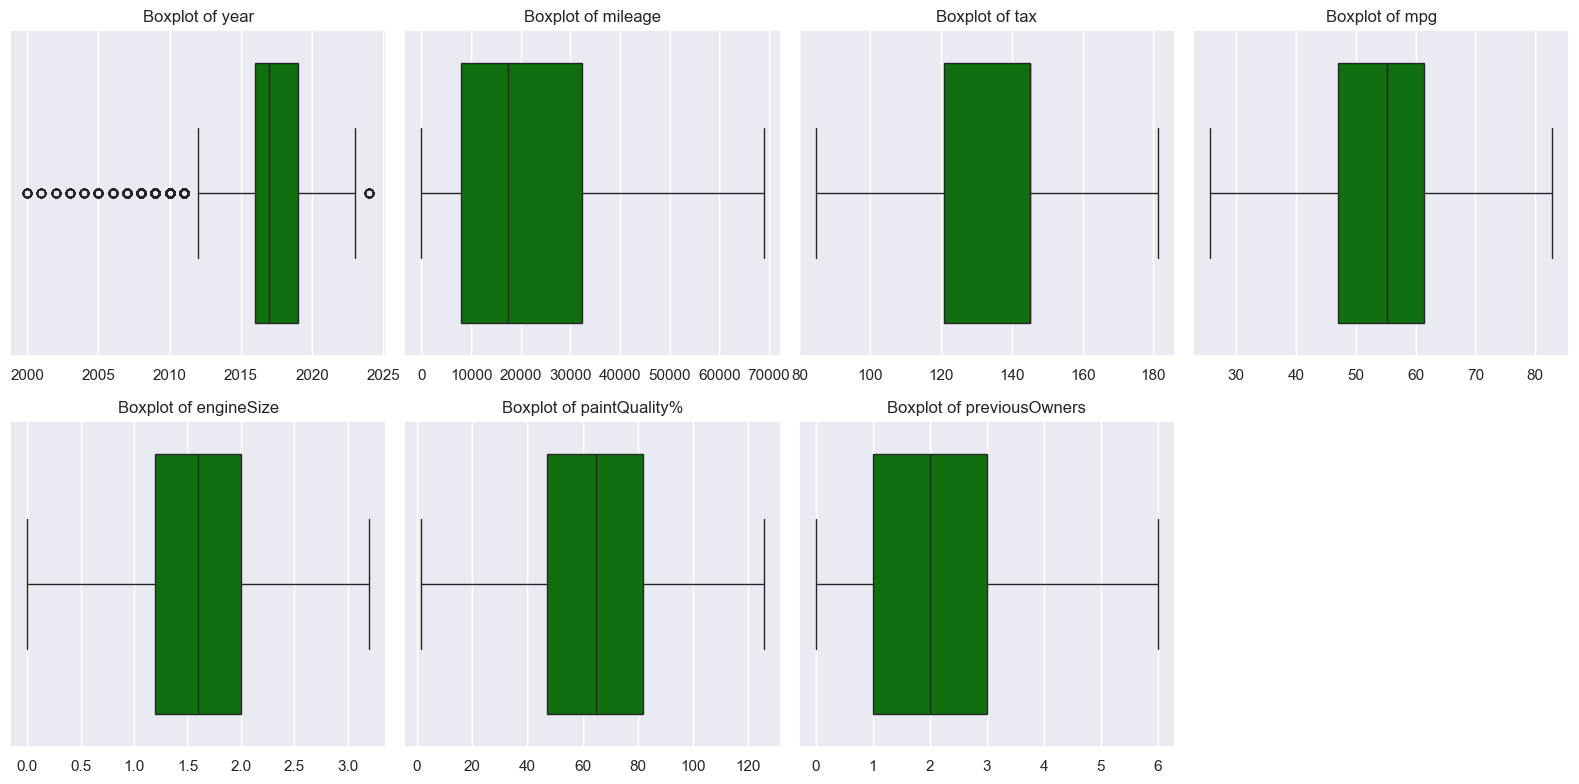

In [903]:

#Select only the numeric columns from the training dataset
num_cols = X_train_num.select_dtypes(include=['number']).columns


#Define the figure size for the boxplots
plt.figure(figsize=(16, 8))


for i, col in enumerate(num_cols, 1):
    plt.subplot(2, len(num_cols)//2 + 1, i)  
    sns.boxplot(x=X_train_num[col], color='green')  
    plt.title(f'Boxplot of {col}', fontsize=12)  
    plt.xlabel('')  
    plt.ylabel('')  


plt.tight_layout()
plt.show()


### **<span style="color:#689f38;">Analysing Relationships Between Features</span>**


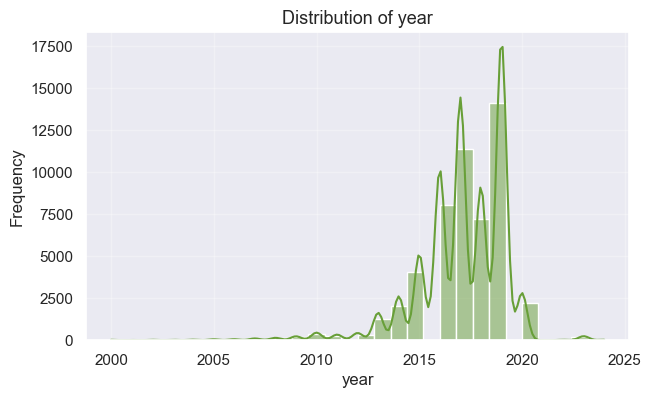

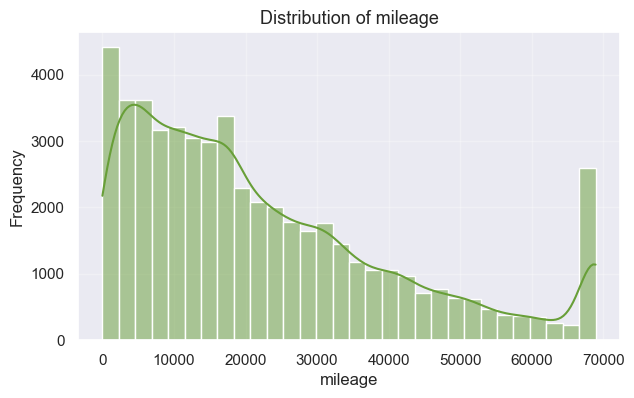

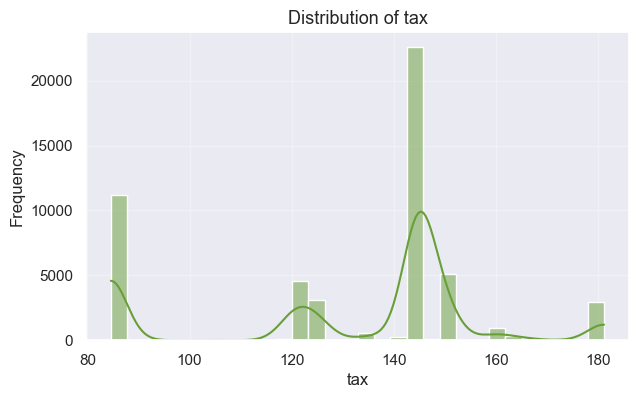

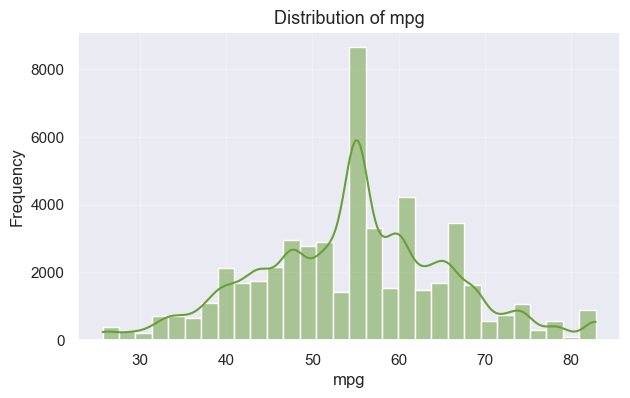

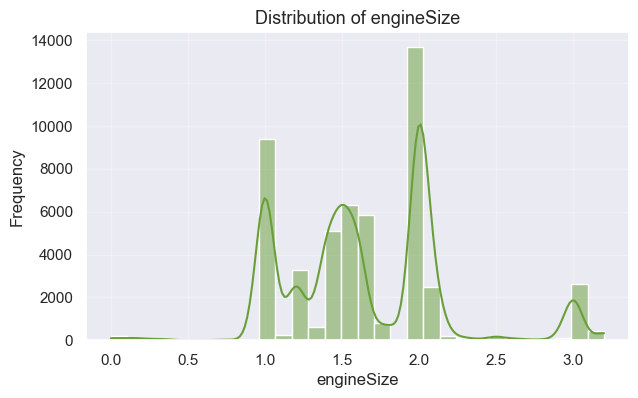

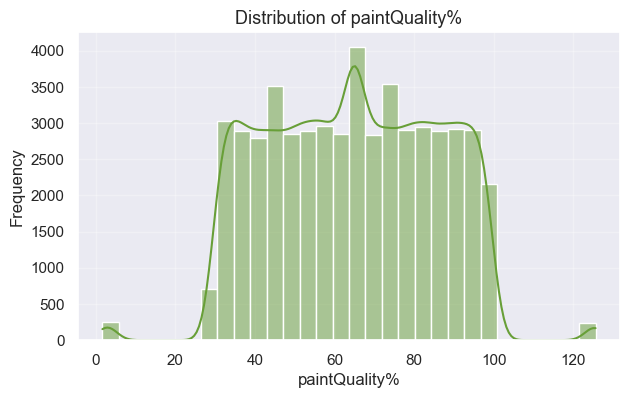

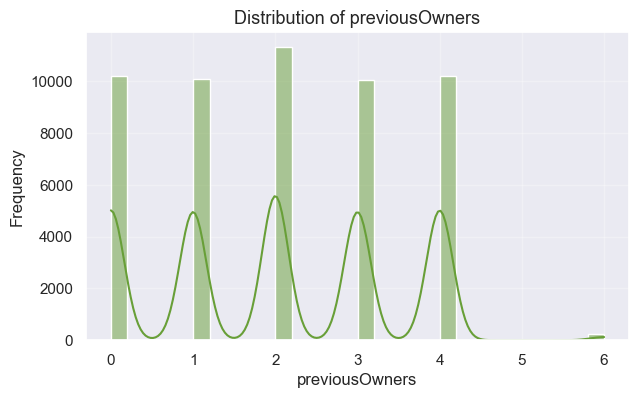

In [904]:
for col in X_train_num:

    plt.figure(figsize=(7,4))
    sns.histplot(X_train_num[col], bins=30, kde=True, color="#689f38")
    plt.title(f"Distribution of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.show()

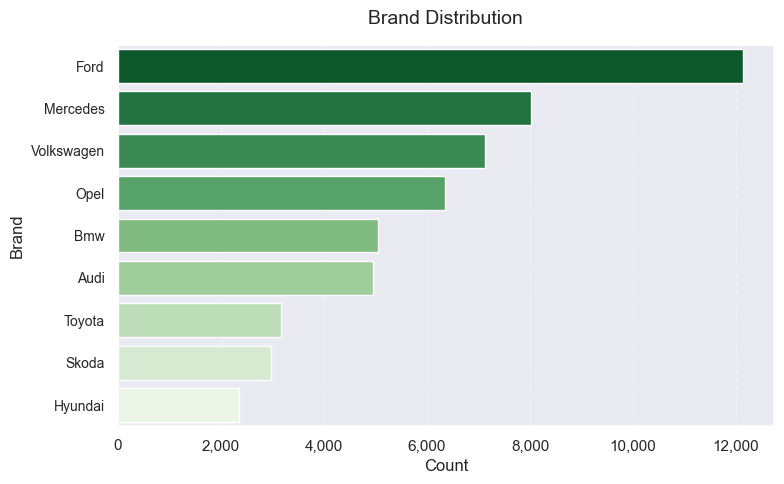

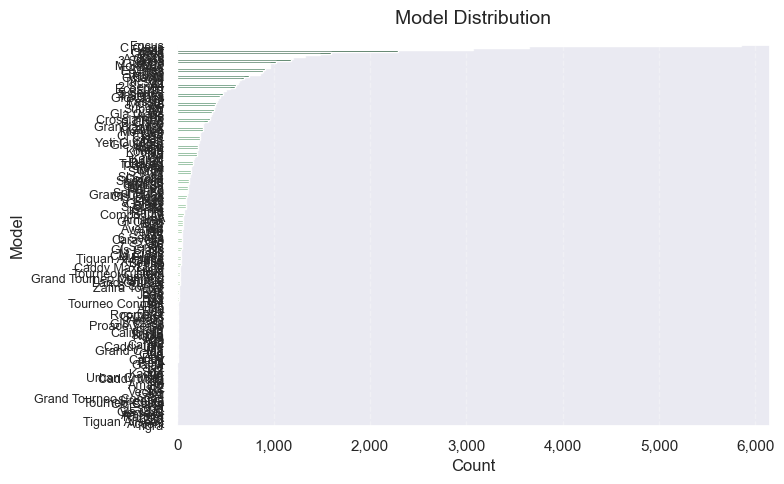

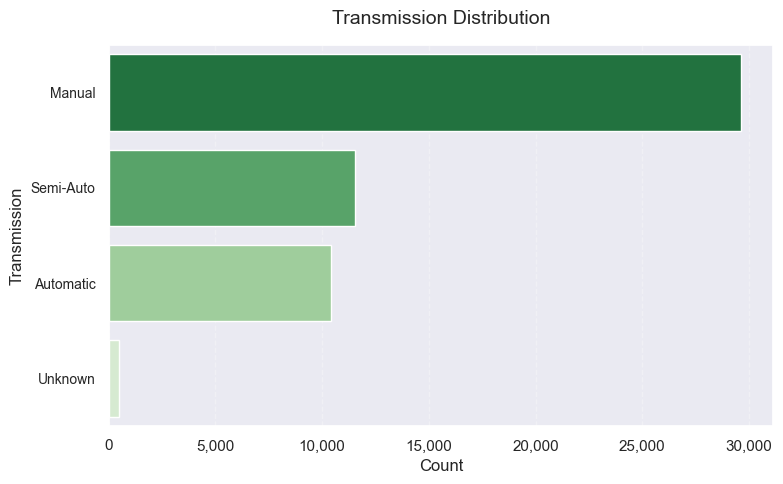

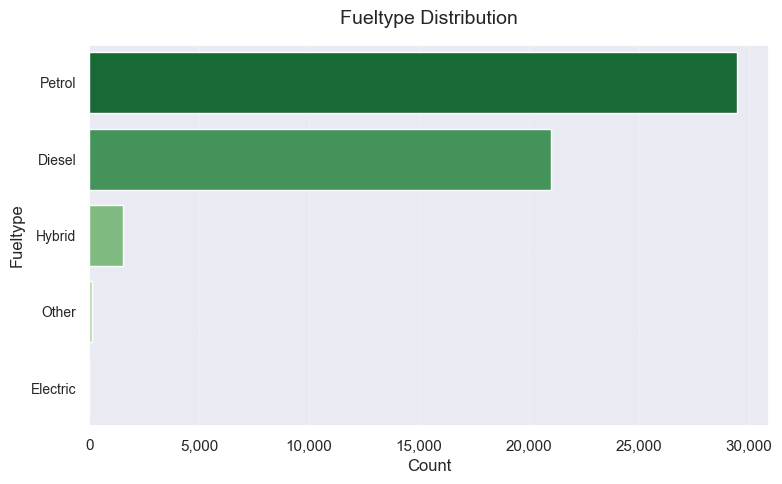

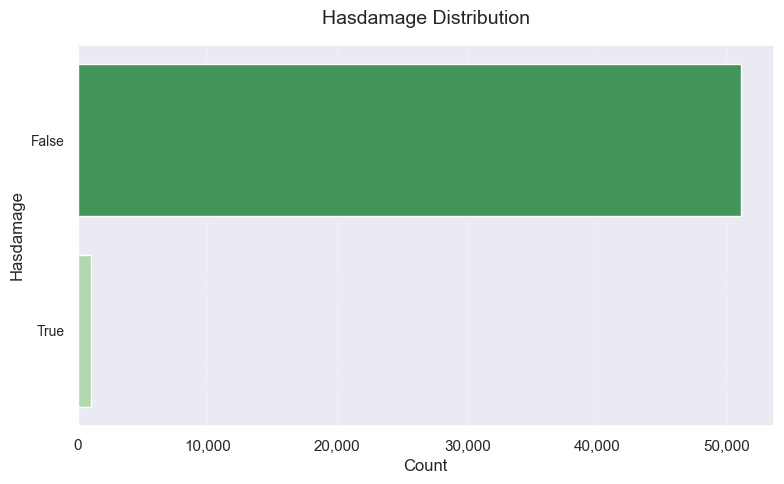

In [905]:

for col in X_train_cat:

    plt.figure(figsize=(8, 5))
    order = X_train_cat[col].value_counts().index
    ax = sns.countplot(y=col, data=X_train_cat, order=order, palette="Greens_r")

    # Title and labels
    plt.title(f"{col.replace('_', ' ').title()} Distribution", fontsize=14, pad=15)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel(col.replace('_', ' ').title(), fontsize=12)

    # Apply thousand separator and grid
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    plt.grid(alpha=0.3, axis="x", linestyle="--")

    # Rotate labels for long names
    if X_train_cat[col].nunique() > 10:
        plt.yticks(fontsize=9)
    else:
        plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">


**1. HasDamage Distribution**<br>
This chart shows the distribution of the 'HasDamage' feature, indicating whether cars have been reported as damaged ('True') or not ('False').
The majority of cars in the dataset **do not have damage**. The dataset is **imbalanced** with a **highly skewed distribution** toward cars without damage, this might affect model performance.


**2. Fuel Type Distribution**<br>
This chart visualizes the distribution of car fuel types in the dataset.<br>
- **Petrol** is the most common fuel type.
- **Diesel** follows as the second most common fuel type, with a smaller proportion.
- **Hybrid**, **Other**, and **Electric** fuel types make up a **very small fraction** of the dataset.


**3. Transmission Distribution**<br>
This chart shows the distribution of car 'Transmission' types in the dataset.<br>
- **Manual** transmission cars are the most common.
- **Semi-Auto**, **Unknown**  and **Automatic** transmissions have a smaller portion of the dataset.


**4. Model Distribution** <br>
This chart illustrates the distribution of various car **models** in the dataset. <br>
The distribution of **models is extremely skewed**, we should have that in consideration when scaling.


**5. Brand Distribution**<br>
This chart shows the distribution of car **brands** in the dataset. **Ford** is the most frequent car brand, followed by **Mercedes**, **Volkswagen**.<br>
The **minority brands** could be **under-represented**, which might affect the model's ability to predict prices for these brands. 


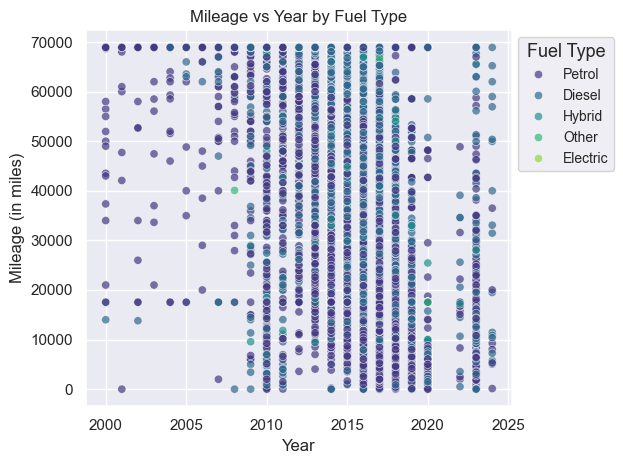

In [906]:
# Create scatter plot with hue for 'fuelType'
sns.scatterplot(x=X_train_num['year'], y=X_train_num['mileage'], hue=X_train_cat['fuelType'], palette='viridis', alpha=0.7)

# Set the title and labels
plt.title('Mileage vs Year by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Mileage (in miles)')

# Customize the legend to be outside the plot
plt.legend(title='Fuel Type', title_fontsize='13', fontsize='10', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust plot size to accommodate the legend outside
plt.tight_layout()

# Show the plot
plt.show()


<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">
<strong>Mileage vs Year by Fuel Type</strong>


- **Petrol and Diesel**: Most cars are from the **2010s**, with mileage ranging from **50,000 to 200,000 miles**. Diesel cars tend to have **slightly higher mileage**.
- **Hybrid Cars**: Predominantly from the **2010s**, with **lower mileage**, likely due to their recent popularity.
- **Outliers**: One car has **extremely high mileage** (~350,000 miles), likely a commercial vehicle.


In Conclusion, **Older cars** have **higher mileage**, while **newer cars** (especially **Hybrid** and **Electric**) tend to have **lower mileage**.



### **<span style="color:#689f38;">Feature Creation</span>**


<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">
Try to create new features before removing the irrelevant features <br>
Re-do feature selection <br>
Keep the relevant features.

In [907]:
def feature_engineering(df, current_year=2025):

    df_fe = df.copy()
    
    #Car age
    if 'year' in df_fe.columns:
        df_fe['car_age'] = current_year - df_fe['year']
        df_fe['car_age'] = df_fe['car_age'].clip(lower=0)  #avoid negative age
    
    #Mileage per year 
    if 'mileage' in df_fe.columns and 'car_age' in df_fe.columns:
        df_fe['mileage_per_year'] = df_fe['mileage'] / df_fe['car_age'].replace(0,1)
    
    return df_fe


In [908]:
#Apply feature engineering to training, validation, and test sets
X_train_num = feature_engineering(X_train_num)
X_val_num = feature_engineering(X_val_num)
cars_test_num = feature_engineering(cars_test_num)


### **<span style="color:#689f38;">Scaling</span>**


<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

We chose to use StandardScaler instead of MinMaxScaler because we do not want to compress the data into a fixed range (such as [0, 1]) that MinMaxScaler would do. Compressing the data might distort the relationships between the features, especially when the data contains outliers.

Since we will be using linear regression (and other models) later, it's important to have features with standardized scales (mean = 0, standard deviation = 1), as this ensures that all features contribute equally to the model without being affected by differing scales. StandardScaler helps achieve this, making it a better choice for models like linear regression, which are sensitive to the scale of input features. 


**<span style="color:#8bc34a;">Standard Scaler</span>**

In [909]:
'''# 1 Initialize scaler
scaler = StandardScaler()

# 2 Fit only on TRAINING data
scaler.fit(X_train_num)

# 3 Transform all splits (using training parameters)
X_train_num_scaled = scaler.transform(X_train_num)
X_val_num_scaled = scaler.transform(X_val_num)
cars_test_num_scaled = scaler.transform(cars_test_num)'''

'# 1 Initialize scaler\nscaler = StandardScaler()\n\n# 2 Fit only on TRAINING data\nscaler.fit(X_train_num)\n\n# 3 Transform all splits (using training parameters)\nX_train_num_scaled = scaler.transform(X_train_num)\nX_val_num_scaled = scaler.transform(X_val_num)\ncars_test_num_scaled = scaler.transform(cars_test_num)'

In [910]:
'''# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled.head()'''

'# Convert the array to a pandas dataframe\nX_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)\nX_train_num_scaled.head()'

In [911]:
#X_val_num.shape

In [912]:
#X_val_num_scaled.shape

In [913]:
#X_val_num_scaled = scaler.transform(X_val_num)
#X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
#X_val_num_scaled.head(3)

In [914]:
#cars_test_num_scaled= scaler.transform(cars_test_num)
#cars_test_num_scaled = pd.DataFrame(cars_test_num_scaled, columns = cars_test_num.columns).set_index(cars_test.index)
#cars_test_num_scaled.head(3)

In [915]:
#1. Frequency Encoding for Training
def frequency_encoding(df):
    df_encoded = df.copy()
    # Map the frequency count of 'brand' and 'model' to new columns
    df_encoded['brand_freq'] = df['brand'].map(df['brand'].value_counts())
    df_encoded['model_freq'] = df['model'].map(df['model'].value_counts())
    return df_encoded

#Apply frequency encoding to the training data
X_train_cat_encoded = frequency_encoding(X_train_cat)



#2. Frequency Encoding for Validation and Test (using frequencies from the training data)
def encode_like_train(df, X_train_cat):
    df_encoded = df.copy()
    #Map the frequency learned from the training set
    df_encoded['brand_freq'] = df['brand'].map(X_train_cat['brand'].value_counts())
    df_encoded['model_freq'] = df['model'].map(X_train_cat['model'].value_counts())
    #Replace any unseen categories with 0
    df_encoded['brand_freq'].fillna(0, inplace=True)
    df_encoded['model_freq'].fillna(0, inplace=True)
    return df_encoded

#Apply frequency encoding to validation and test data using training data frequencies
X_val_cat_encoded = encode_like_train(X_val_cat, X_train_cat)
cars_test_cat_encoded = encode_like_train(cars_test_cat, X_train_cat)



#3. One-Hot Encoding (fit on training, apply on validation/test)
categorical_cols = ['transmission', 'fuelType', 'hasDamage']

#Fit One-Hot Encoder on training data
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_array_train = ohe.fit_transform(X_train_cat[categorical_cols])

#Transform validation and test data without refitting the encoder
encoded_array_val = ohe.transform(X_val_cat[categorical_cols])
encoded_array_test = ohe.transform(cars_test_cat[categorical_cols])

#Create DataFrames from encoded arrays and align indices
encoded_cols = ohe.get_feature_names_out(categorical_cols)
encoded_train_df = pd.DataFrame(encoded_array_train, columns=encoded_cols, index=X_train_cat.index)
encoded_val_df = pd.DataFrame(encoded_array_val, columns=encoded_cols, index=X_val_cat.index)
encoded_test_df = pd.DataFrame(encoded_array_test, columns=encoded_cols, index=cars_test_cat.index)


#4. Combine Frequency and One-Hot Encoded Data
#Concatenate frequency-encoded columns and one-hot encoded columns for training, validation, and test
X_train_cat_final = pd.concat([
    X_train_cat_encoded[['brand_freq', 'model_freq']],
    encoded_train_df
], axis=1)

X_val_cat_final = pd.concat([
    X_val_cat_encoded[['brand_freq', 'model_freq']],
    encoded_val_df
], axis=1)

cars_test_cat_final = pd.concat([
    cars_test_cat_encoded[['brand_freq', 'model_freq']],
    encoded_test_df
], axis=1)



#5. Ensure Validation/Test Data Has the Same Columns as Training Data
#Reindex validation and test sets to match the training columns
X_val_cat_final = X_val_cat_final.reindex(columns=X_train_cat_final.columns, fill_value=0)
cars_test_cat_final = cars_test_cat_final.reindex(columns=X_train_cat_final.columns, fill_value=0)




<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">
For Encoding we used two methods:<br>

- **Frequency Encoding** -> applied to **model_freq** and **brand_freq** because they have a lot of unique values, so doesn´t make sense to use OneHotEncoding, since this would create a lot of columns. However, it is in our knowledge, that this approach also has desavantages, for example, two features becoming one if they have the same frequency, that's why we only used on these two variables.
- **OneHotEncoding** -> applied to the rest of the categorical features, creating binary columns based on the categories present in the data.

In [916]:
# Sin_ncaling the 2 features that we encoded using the frequency encoder
X_train_num = pd.concat([X_train_num, X_train_cat_final[['brand_freq', 'model_freq']]], axis=1)
X_val_num = pd.concat([X_val_num, X_val_cat_final[['brand_freq', 'model_freq']]], axis=1)
cars_test_num = pd.concat([cars_test_num, cars_test_cat_final [['brand_freq', 'model_freq']]], axis=1)

In [917]:
# 1 Initialize scaler
scaler = StandardScaler()

# 2 Fit only on TRAINING data
scaler.fit(X_train_num)

# 3 Transform all splits (using training parameters)
X_train_num_scaled = scaler.transform(X_train_num)
X_val_num_scaled = scaler.transform(X_val_num)
cars_test_num_scaled = scaler.transform(cars_test_num)

In [918]:
X_train_num.head()

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,car_age,mileage_per_year,brand_freq,model_freq
carID,,,,,,,,,,,
16738,2019,11291.0,120.838539,55.238512,1.0,49.0,1,6,1881.833333,12129,5854
2893,2017,10950.0,145.000000,51.400000,1.4,84.0,0,8,1368.750000,4960,665
65373,2016,32939.0,84.596347,64.200000,1.0,68.0,3,9,3659.888889,7123,423
9570,2016,52511.0,125.000000,60.100000,2.0,52.0,3,9,5834.555556,5052,480
6213,2019,7524.0,137.000000,50.400000,2.0,77.0,3,6,1254.000000,4960,344


In [919]:
# Re-Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled.head()

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,car_age,mileage_per_year,brand_freq,model_freq
carID,,,,,,,,,,,
16738,0.866944,-0.603362,-0.380579,0.044903,-1.218918,-0.745311,-0.715158,-0.866944,-0.354468,1.561905,2.321816
2893,-0.037988,-0.621796,0.491994,-0.299160,-0.467709,0.936609,-1.417305,0.037988,-0.596311,-0.724491,-0.550991
65373,-0.490453,0.566923,-1.689439,0.848161,-1.218918,0.167731,0.689137,0.490453,0.483624,-0.034649,-0.684970
9570,-0.490453,1.624980,-0.230291,0.480659,0.659105,-0.601146,0.689137,0.490453,1.508661,-0.695149,-0.653413
6213,0.866944,-0.807004,0.203080,-0.388795,0.659105,0.600225,0.689137,-0.866944,-0.650399,-0.724491,-0.728707


In [920]:
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled.head(3)

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,car_age,mileage_per_year,brand_freq,model_freq
carID,,,,,,,,,,,
36544,-0.037988,-0.166505,-0.380579,0.044903,-0.092104,-0.216707,-0.01301,0.037988,-0.100094,0.249516,1.103821
55406,-0.037988,-0.294843,-1.689439,2.519843,-0.279907,-1.273914,-0.01301,0.037988,-0.239968,-1.293777,-0.388222
351,0.866944,-0.967778,1.647650,-1.571970,0.659105,-1.273914,-0.01301,-0.866944,-0.884033,-0.724491,-0.841095


In [921]:
cars_test_num_scaled = pd.DataFrame(cars_test_num_scaled, columns = cars_test_num.columns).set_index(cars_test.index)
cars_test_num_scaled.head(3)

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,car_age,mileage_per_year,brand_freq,model_freq
carID,,,,,,,,,,,
89856,2.224341,0.445883,1.800854,-1.186541,-0.092104,-0.168652,0.689137,-2.224341,3.582039,-1.556255,-0.770230
106581,-0.037988,1.391423,0.672565,-1.482335,0.659105,-0.216707,-0.013010,0.037988,1.597877,-0.034649,-0.444139
80886,-0.490453,0.775215,-0.230291,-0.299160,-0.279907,1.417157,-0.013010,0.490453,0.685416,-0.695149,-0.588084


In [922]:
X_train_cat_final =  X_train_cat_final.drop(columns=['brand_freq', 'model_freq'])
X_val_cat_final = X_val_cat_final.drop(columns=['brand_freq', 'model_freq'])
cars_test_cat_final = cars_test_cat_final.drop(columns=['brand_freq', 'model_freq'])

#Concat and get the final dataframe
X_val_final = pd.concat([
    X_val_num_scaled.reset_index(),
    X_val_cat_final.reset_index(drop=True)
], axis=1)

X_train_final = pd.concat([
    X_train_num_scaled.reset_index(),
    X_train_cat_final.reset_index(drop=True)
], axis=1)

cars_test_final = pd.concat([
    cars_test_num_scaled.reset_index(),
    cars_test_cat_final.reset_index(drop=True)
], axis=1)

X_val_final.set_index('carID', inplace=True)
X_train_final.set_index('carID', inplace=True)
cars_test_final.set_index('carID', inplace=True)



In [923]:
X_train_final.head()

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,car_age,mileage_per_year,brand_freq,model_freq,transmission_Manual,transmission_Semi-Auto,transmission_Unknown,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,hasDamage_True
carID,,,,,,,,,,,,,,,,,,,
16738,0.866944,-0.603362,-0.380579,0.044903,-1.218918,-0.745311,-0.715158,-0.866944,-0.354468,1.561905,2.321816,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2893,-0.037988,-0.621796,0.491994,-0.299160,-0.467709,0.936609,-1.417305,0.037988,-0.596311,-0.724491,-0.550991,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65373,-0.490453,0.566923,-1.689439,0.848161,-1.218918,0.167731,0.689137,0.490453,0.483624,-0.034649,-0.684970,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9570,-0.490453,1.624980,-0.230291,0.480659,0.659105,-0.601146,0.689137,0.490453,1.508661,-0.695149,-0.653413,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6213,0.866944,-0.807004,0.203080,-0.388795,0.659105,0.600225,0.689137,-0.866944,-0.650399,-0.724491,-0.728707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **<span style="color:#689f38;">Modeling</span>**


### **<span style="color:#689f38;">Feature Selection</span>**


#### **<span style="color:#8bc34a;">Filter Methods</span>**

In [924]:
#Check for constant features
X_val_num.var() 

year                4.686137e+00
mileage             3.557669e+08
tax                 7.664827e+02
mpg                 1.221776e+02
engineSize          2.810151e-01
paintQuality%       4.333159e+02
previousOwners      2.013620e+00
car_age             4.686137e+00
mileage_per_year    4.660764e+06
brand_freq          9.640120e+06
model_freq          3.174032e+06
dtype: float64

In [925]:
cars_test_num.var() 

year                4.783224e+00
mileage             3.477832e+08
tax                 7.675087e+02
mpg                 1.254578e+02
engineSize          2.785152e-01
paintQuality%       4.384193e+02
previousOwners      2.019934e+00
car_age             4.783224e+00
mileage_per_year    4.688259e+06
brand_freq          9.770521e+06
model_freq          3.209321e+06
dtype: float64

**<span style="color:#8bc34a;">Correlation Matrix</span>**

In [926]:
cor_spearman = X_train_num.corr(method ='spearman')
cor_spearman

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,car_age,mileage_per_year,brand_freq,model_freq
year,1.000000,-0.775551,0.317746,-0.295772,-0.036991,0.004798,0.001608,-1.000000,-0.633739,-0.013583,-0.018841
mileage,-0.775551,1.000000,-0.263793,0.305385,0.096139,-0.001177,0.003449,0.775551,0.972736,0.013973,0.027795
tax,0.317746,-0.263793,1.000000,-0.542595,0.132993,0.009791,0.000339,-0.317746,-0.234978,-0.091476,-0.230282
mpg,-0.295772,0.305385,-0.542595,1.000000,-0.184752,-0.001453,0.002722,0.295772,0.298200,0.059750,0.205868
engineSize,-0.036991,0.096139,0.132993,-0.184752,1.000000,0.009814,0.002323,0.036991,0.097484,-0.075659,-0.226068
paintQuality%,0.004798,-0.001177,0.009791,-0.001453,0.009814,1.000000,-0.003169,-0.004798,-0.000333,-0.002818,-0.004732
previousOwners,0.001608,0.003449,0.000339,0.002722,0.002323,-0.003169,1.000000,-0.001608,0.004941,0.006188,-0.003467
car_age,-1.000000,0.775551,-0.317746,0.295772,0.036991,-0.004798,-0.001608,1.000000,0.633739,0.013583,0.018841
mileage_per_year,-0.633739,0.972736,-0.234978,0.298200,0.097484,-0.000333,0.004941,0.633739,1.000000,0.015199,0.032648
brand_freq,-0.013583,0.013973,-0.091476,0.059750,-0.075659,-0.002818,0.006188,0.013583,0.015199,1.000000,0.491287


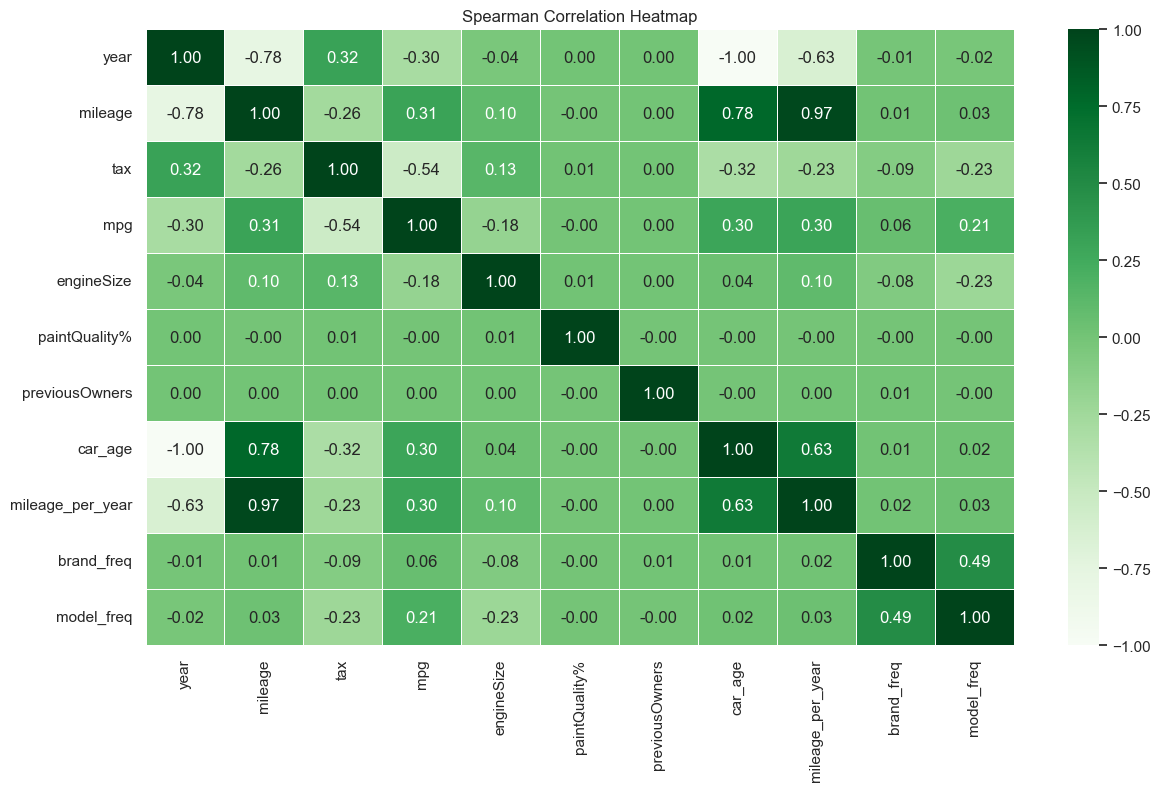

In [927]:
#Plot the heatmap for the correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(cor_spearman, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5, cbar=True)

#Display the plot
plt.title('Spearman Correlation Heatmap')
plt.show()

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

By the correlation matrix we can see that the new features added have a strong correlation with previous features, so for modeling improvement we are going to deleted them in feature selection part.

#### **<span style="color:#8bc34a;">Wrapper Methods</span>**

**<span style="color:#8bc34a;">RFE</span>**

In [928]:
model = LogisticRegression()

In [929]:
rfe = RFE(estimator = model, n_features_to_select = 3)

In [930]:
#X_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train) 
#X_train_num_scaled.columns
#rfe.support_
#rfe.ranking_
#selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
#selected_features

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #8bc34a; margin-bottom: 15px; width: 100%; box-sizing: border-box;">

We attempted to apply **Recursive Feature Elimination (RFE)** for feature selection with the 'LogisticRegression' model. The goal was to select the top 3 features that have the most predictive power for the target variable. <br>
We initialized the **LogisticRegression** model and used **RFE** to select the best features.
Unfortunately, the model took too long to run, and we did not obtain any results in a reasonable amount of time. As a result, this section of code has been commented out for now, as the feature selection process was not completed successfully.<br>
We will use other methods to perform feature selection.



#### **<span style="color:#8bc34a;">Embedded Methods</span>**

In [931]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh", color = 'green')
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [932]:
reg = LassoCV()

In [933]:
reg.fit(X_train_num_scaled, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,None
,verbose,False
,n_jobs,None


In [934]:
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef.abs().sort_values(ascending = False)

engineSize          5783.054849
year                3646.172665
mpg                 1621.496915
mileage_per_year    1375.050805
mileage              846.131349
tax                  561.620946
brand_freq           180.089343
paintQuality%         47.763360
car_age               13.772503
previousOwners        10.727668
model_freq             4.852659
dtype: float64

<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
    We can see that the variables <strong>year</strong> and <strong>engineSize</strong> have higher coefficents which means that they are important features. Although, we need to check multicollinearity between these features because some of them can be redundant.<br>
    Features like <strong>previousOwners</strong> and <strong>car_age</strong> have lower coefficients, meaning they are less important so they don't contribute much to the prediction. We might consider dropping these features for model simplicity and efficiency, but we need to check later on.
</div>

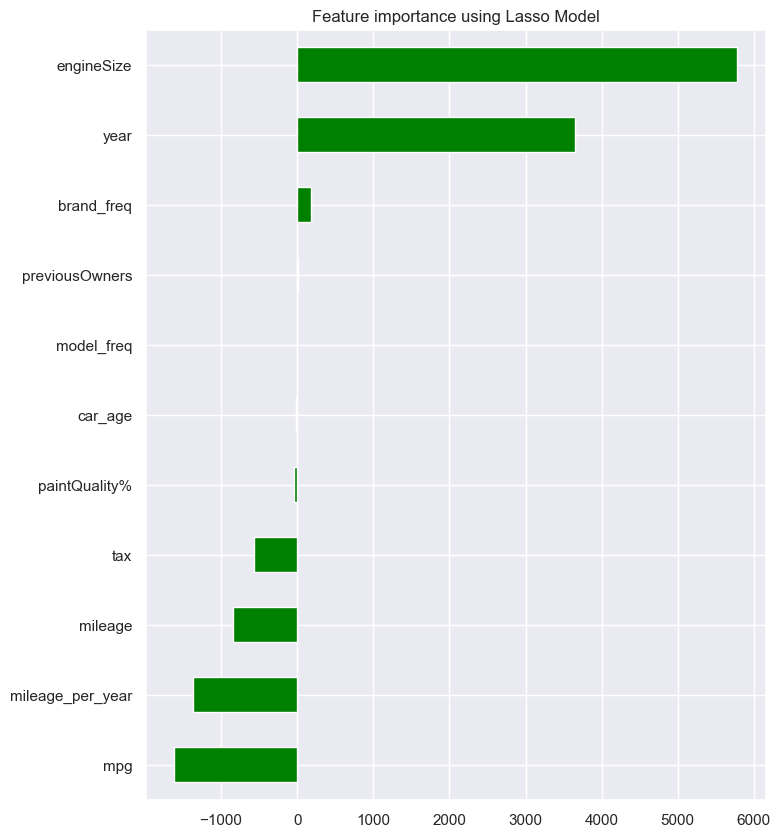

In [935]:
# CODE HERE
plot_importance(coef,'Lasso')

**<span style="color:#8bc34a;">Chi-Square for categorical data</span>**

In [936]:
def TestIndependence(X, y, var, alpha=0.05):
    # Create contingency table
    dfObserved = pd.crosstab(y, X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index=dfObserved.index)
    
    # Apply Bonferroni correction to adjust alpha
    corrected_alpha = alpha / len(X)  # Adjust alpha for multiple comparisons
    
    if p < corrected_alpha:
        result = f"{var} is IMPORTANT for Prediction (p-value: {p:.4f})"
    else:
        result = f"{var} is NOT an important predictor (p-value: {p:.4f}). Discard {var} from model."
    print(result)

# Example usage for each categorical variable
for var in X_train_cat_final:
    TestIndependence(X_train_cat_final[var], y_train, var)

transmission_Manual is IMPORTANT for Prediction (p-value: 0.0000)
transmission_Semi-Auto is IMPORTANT for Prediction (p-value: 0.0000)
transmission_Unknown is IMPORTANT for Prediction (p-value: 0.0000)
fuelType_Electric is NOT an important predictor (p-value: 0.9980). Discard fuelType_Electric from model.
fuelType_Hybrid is IMPORTANT for Prediction (p-value: 0.0000)
fuelType_Other is NOT an important predictor (p-value: 1.0000). Discard fuelType_Other from model.
fuelType_Petrol is IMPORTANT for Prediction (p-value: 0.0000)
hasDamage_True is NOT an important predictor (p-value: 0.0048). Discard hasDamage_True from model.


#### **<span style="color:#8bc34a;">Numerical Data</span>**

| Predictor | Lasso | 
| --- | --- | 
| engineSize| Keep |  
| year | Keep | 
| mileage_per_year| Keep|
| car_age| Not Keep|
| paintQuality% | Keep | 
| previousOwners | Not Keep | 
| tax | Keep | 


#### **<span style="color:#8bc34a;">Categorical Data</span>**

| Predictor | Chi-Square | 
| --- | --- | 
| brand_freq | Keep |  
| model_freq | Keep | 
| transmission_Manual | Keep|
| transmission_Semi-Auto | Keep|
| transmission_Unknown | Keep|
| fuelType_Electric | Not Keep|
| fuelType_Hybrid | Keep|
| fuelType_Other | Not Keep|
| fuelType_Petrol | Keep|
| hasDamage_True | Not Keep|

<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
    After analysing (Lasso, Chi-Square and correlation matrix) we came to the conclusion of dropping <strong>'fuelType_Electric', 'fuelType_Other', 'car_age', 'mileage_per_year', 'hasDamage_True' and 'previousOwners'</strong> features, as they are not relevant to the price prediction
</div>

In [937]:
X_train_final.drop(columns=['fuelType_Electric', 'fuelType_Other','car_age','mileage_per_year','hasDamage_True','previousOwners'], inplace=True)
X_val_final.drop(columns=['car_age','fuelType_Electric', 'fuelType_Other','car_age','mileage_per_year','hasDamage_True','previousOwners'], inplace=True)
cars_test_final.drop(columns=['car_age','fuelType_Electric', 'fuelType_Other','car_age','mileage_per_year','hasDamage_True','previousOwners'], inplace=True)

**<span style="color:#8bc34a;">Correlation Matrix</span>**

In [938]:
cor_spearman = X_train_final.corr(method ='spearman')
cor_spearman

,year,mileage,tax,mpg,engineSize,paintQuality%,brand_freq,model_freq,transmission_Manual,transmission_Semi-Auto,transmission_Unknown,fuelType_Hybrid,fuelType_Petrol
year,1.000000,-0.775551,0.317746,-0.295772,-0.036991,0.004798,-0.013583,-0.018841,-0.158880,0.172492,0.010597,-0.013041,0.099433
mileage,-0.775551,1.000000,-0.263793,0.305385,0.096139,-0.001177,0.013973,0.027795,0.137985,-0.147890,-0.010926,0.019651,-0.189573
tax,0.317746,-0.263793,1.000000,-0.542595,0.132993,0.009791,-0.091476,-0.230282,-0.151519,0.130599,0.004686,-0.152837,0.131715
mpg,-0.295772,0.305385,-0.542595,1.000000,-0.184752,-0.001453,0.059750,0.205868,0.192718,-0.163526,-0.002573,0.219109,-0.324782
engineSize,-0.036991,0.096139,0.132993,-0.184752,1.000000,0.009814,-0.075659,-0.226068,-0.503520,0.322979,-0.002754,0.061663,-0.606174
paintQuality%,0.004798,-0.001177,0.009791,-0.001453,0.009814,1.000000,-0.002818,-0.004732,-0.002332,0.000841,0.000507,-0.001340,-0.002865
brand_freq,-0.013583,0.013973,-0.091476,0.059750,-0.075659,-0.002818,1.000000,0.491287,0.089929,-0.027243,-0.001410,-0.165914,0.011993
model_freq,-0.018841,0.027795,-0.230282,0.205868,-0.226068,-0.004732,0.491287,1.000000,0.156622,-0.068633,-0.009364,-0.104452,0.155116
transmission_Manual,-0.158880,0.137985,-0.151519,0.192718,-0.503520,-0.002332,0.089929,0.156622,1.000000,-0.612862,-0.112070,-0.189129,0.279247
transmission_Semi-Auto,0.172492,-0.147890,0.130599,-0.163526,0.322979,0.000841,-0.027243,-0.068633,-0.612862,1.000000,-0.052100,-0.044501,-0.134005


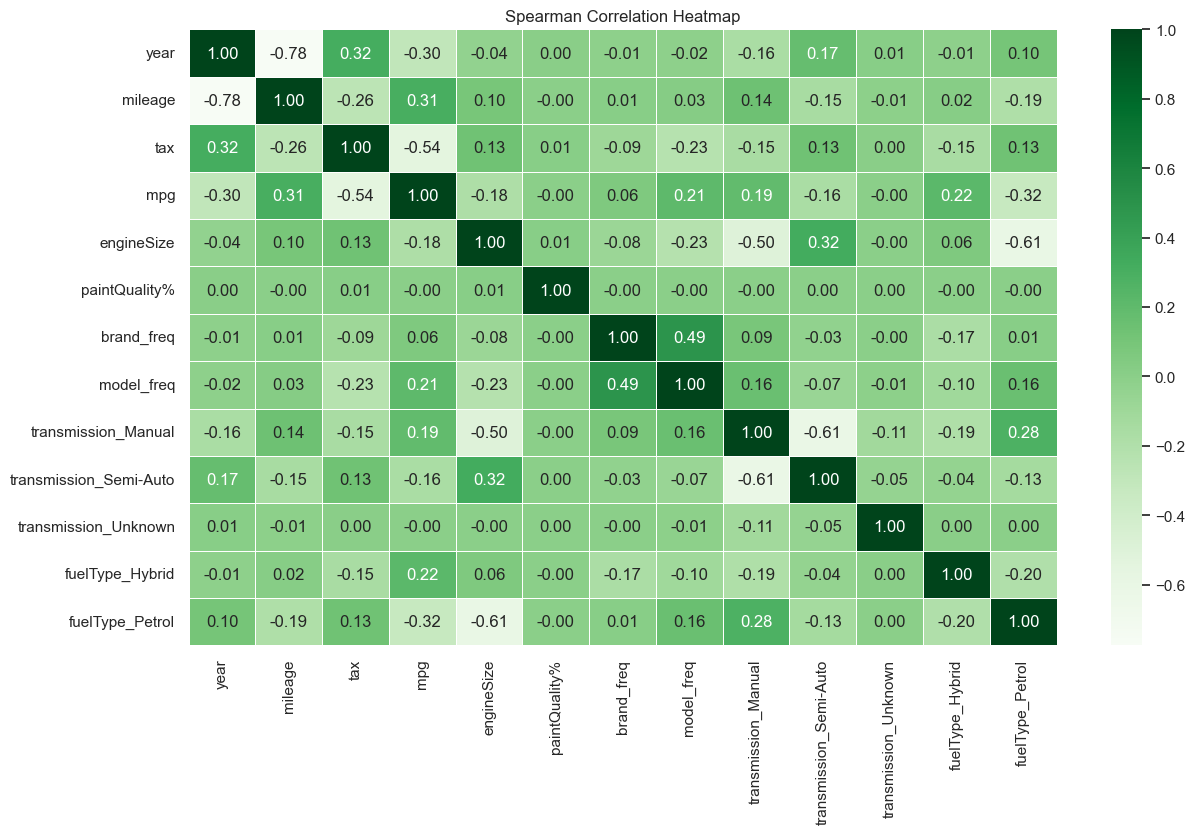

In [939]:
#Plot the heatmap for the correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(cor_spearman, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5, cbar=True)

#Display the plot
plt.title('Spearman Correlation Heatmap')
plt.show()

### **<span style="color:#689f38;">Model Evaluation</span>**


#### **<span style="color:#8bc34a;">Linear Regression</span>**

In [940]:
lin_model = LinearRegression()

In [941]:
lin_model.fit(X_train_final, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [942]:
predictions = lin_model.predict(X_val_final)
predictions

array([20208.83014747, 16316.2150079 , 27554.07961031, ...,
       20008.49705991, 22272.88204494, 23927.11777171])

In [943]:
val_results = pd.DataFrame({'y_true': y_val.values.flatten(), 'y_pred': predictions.flatten()}, 
                           index=y_val.index #ensures we can map the predictions to each observation correctly
                           )
val_results.head()

,y_true,y_pred
carID,,
36544,16995,20208.830147
55406,12795,16316.215008
351,32888,27554.079610
28130,20847,24378.085743
52265,24000,21660.696896


In [944]:
# Training metrics (step 2)
y_pred_train = lin_model.predict(X_train_final)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print('Training metrics:')
print(f'R²: {r2_train:.4f}')
print(f'MAE: {mae_train:.4f}')

Training metrics:
R²: 0.7036
MAE: 3487.6113


In [945]:
# Validation metrics (step 1)
r2_val = r2_score(y_val, predictions)
mae_val = mean_absolute_error(y_val, predictions)

print('Validation metrics:')
print(f'R²: {r2_val:.4f}')
print(f'MAE: {mae_val:.4f}')

Validation metrics:
R²: 0.6952
MAE: 3532.7230


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">

- **Training R²: 0.7031** | **Validation R²: 0.6947**  
  The model explains about **70%** of the variance in the training data, with a slight drop on the validation set, indicating good generalization.

- **Training MAE: 3489.91** | **Validation MAE: 3533.04**  
  The model has a reasonable error of about **$3489** on the training set and slightly higher on the validation set, showing good accuracy.

</div>

#### **<span style="color:#8bc34a;">Model Evaluation</span>**

In [946]:
lin_model.coef_

array([ 2878.5065482 , -2185.02542823,  -668.54746378, -2026.40291771,
        4529.11374854,   -40.12249921,   427.15604457,   -17.21631726,
       -3435.01636491,  1128.75731401, -1679.50623562,  2537.61275685,
        -864.27539646])

In [947]:
coefs = pd.DataFrame(lin_model.coef_)
coefs

,0
0,2878.506548
1,-2185.025428
2,-668.547464
3,-2026.402918
4,4529.113749
5,-40.122499
6,427.156045
7,-17.216317
8,-3435.016365
9,1128.757314


In [948]:
coefs = coefs.set_index(X_train_final.columns)
coefs

,0
year,2878.506548
mileage,-2185.025428
tax,-668.547464
mpg,-2026.402918
engineSize,4529.113749
paintQuality%,-40.122499
brand_freq,427.156045
model_freq,-17.216317
transmission_Manual,-3435.016365
transmission_Semi-Auto,1128.757314


In [949]:
lin_model.intercept_

np.float64(18983.034989662236)

<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
    The intercept is the expected mean value of Y when all X = 0.  <br>
    Which means that the base price of a car, when all the features have values of 0 (they have no impact on the target), is 18983 dollars.
</div>

#### **<span style="color:#8bc34a;">Calculating the p-values</span>**

In [950]:
# Compare with sklearn coefficients
sk_coef = np.concatenate(([lin_model.intercept_], np.asarray(lin_model.coef_).ravel()))
print('\nSklearn intercept and coefficients:')
print(pd.Series(sk_coef, index=['Intercept'] + list(X_train_final.columns)))


Sklearn intercept and coefficients:
Intercept                 18983.034990
year                       2878.506548
mileage                   -2185.025428
tax                        -668.547464
mpg                       -2026.402918
engineSize                 4529.113749
paintQuality%               -40.122499
brand_freq                  427.156045
model_freq                  -17.216317
transmission_Manual       -3435.016365
transmission_Semi-Auto     1128.757314
transmission_Unknown      -1679.506236
fuelType_Hybrid            2537.612757
fuelType_Petrol            -864.275396
dtype: float64


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
    The features that have coefficient close to 0 are possibly more prone to be removed. <br>
    We are keeping them all
</div>

**<span style="color:#8bc34a;">OLS</span>**

In [951]:
# Statsmodels (full statistical summary)

X_sm = X_train_final.reset_index(drop=True)
y_sm = y_train.reset_index(drop=True)


X_sm = sm.add_constant(X_sm)


ols = sm.OLS(y_sm, X_sm).fit()
pd.set_option('display.max_rows', None)

print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     9517.
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        16:38:25   Log-Likelihood:            -5.2074e+05
No. Observations:               52134   AIC:                         1.042e+06
Df Residuals:                   52120   BIC:                         1.042e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.89

<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
 

The OLS regression model reveals that **newer, larger-engine, and hybrid vehicles** achieve higher resale prices. Conversely, **older cars, those with higher mileage or manual transmissions**, tend to lose value more rapidly.  <br>
According to the high value of P > |t| (p-value > 0.05), number of **model frequency**, this means that we should drop it because there might not be a causal relationship with the target variable.<br>
For the rest of the features, they have a low value of P > |t| (close to zero) so they have a relationship with the target variable. We should not drop them. 

</div>

**<span style="color:#8bc34a;">Ridge</span>**

In [952]:


# Create Ridge regression model with alpha=1.0
ridge_model = Ridge(alpha=1.0)

# Fit the model
ridge_model.fit(X_train_final, y_train)

# Make predictions
y_pred_ridge_train = ridge_model.predict(X_train_final)
y_pred_ridge_val = ridge_model.predict(X_val_final)


print("Ridge Regression Results:")
print(f"Training R²: {r2_score(y_train, y_pred_ridge_train):.4f}")
print(f"Validation R²: {r2_score(y_val, y_pred_ridge_val):.4f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_pred_ridge_train):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_ridge_val):.2f}")
print(f"\nIntercept: {ridge_model.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X_train_final.columns, ridge_model.coef_):
    print(f"  {feature}: {coef:.4f}")

Ridge Regression Results:
Training R²: 0.7036
Validation R²: 0.6952
Training MAE: 3487.59
Validation MAE: 3532.70

Intercept: 18982.91
Coefficients:
  year: 2878.4526
  mileage: -2185.0314
  tax: -668.4655
  mpg: -2026.2773
  engineSize: 4529.0752
  paintQuality%: -40.1222
  brand_freq: 427.0651
  model_freq: -17.2094
  transmission_Manual: -3434.7296
  transmission_Semi-Auto: 1128.8925
  transmission_Unknown: -1675.8645
  fuelType_Hybrid: 2535.8182
  fuelType_Petrol: -864.3572


**<span style="color:#8bc34a;">Lasso</span>**

In [953]:


# Create Lasso regression model with alpha=1.0
lasso_model = Lasso(alpha=1.0, max_iter=10000)

# Fit the model
lasso_model.fit(X_train_final, y_train)

# Make predictions
y_pred_lasso_train = lasso_model.predict(X_train_final)
y_pred_lasso_val = lasso_model.predict(X_val_final)

# Evaluate the model
print("Lasso Regression Results:")
print(f"Training R²: {r2_score(y_train, y_pred_lasso_train):.4f}")
print(f"Validation R²: {r2_score(y_val, y_pred_lasso_val):.4f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_pred_lasso_train):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_lasso_val):.2f}")
print(f"\nIntercept: {lasso_model.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X_train_final.columns, lasso_model.coef_):
    print(f"  {feature}: {coef:.4f}")



Lasso Regression Results:
Training R²: 0.7036
Validation R²: 0.6952
Training MAE: 3486.99
Validation MAE: 3532.09

Intercept: 18979.29
Coefficients:
  year: 2878.1256
  mileage: -2184.4388
  tax: -665.4521
  mpg: -2020.9239
  engineSize: 4531.4848
  paintQuality%: -39.1578
  brand_freq: 423.4576
  model_freq: -15.0252
  transmission_Manual: -3432.6167
  transmission_Semi-Auto: 1125.5811
  transmission_Unknown: -1571.5050
  fuelType_Hybrid: 2496.9253
  fuelType_Petrol: -858.4777


**<span style="color:#8bc34a;">ElasticNet</span>**

In [954]:


# Create Elastic Net model with alpha=1.0 and l1_ratio=0.5 (equal mix of L1 and L2)
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000)

# Fit the model
elastic_model.fit(X_train_final, y_train)

# Make predictions
y_pred_elastic_train = elastic_model.predict(X_train_final)
y_pred_elastic_val = elastic_model.predict(X_val_final)

# Evaluate the model
print("Elastic Net Regression Results:")
print(f"Training R²: {r2_score(y_train, y_pred_elastic_train):.4f}")
print(f"Validation R²: {r2_score(y_val, y_pred_elastic_val):.4f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_pred_elastic_train):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_elastic_val):.2f}")
print(f"\nIntercept: {elastic_model.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X_train.columns, elastic_model.coef_):
    print(f"  {feature}: {coef:.4f}")
    
# Count how many features were selected (non-zero coefficients)
n_features_selected = sum(elastic_model.coef_ != 0)
print(f"\nFeatures selected: {n_features_selected} out of {len(elastic_model.coef_)}")

Elastic Net Regression Results:
Training R²: 0.6454
Validation R²: 0.6329
Training MAE: 3678.14
Validation MAE: 3744.38

Intercept: 17993.76
Coefficients:
  brand: 2096.2236
  model: -1719.3065
  year: 212.5500
  transmission: -1425.9864
  mileage: 3238.2983
  fuelType: -21.1695
  tax: 25.4961
  mpg: -108.6355
  engineSize: -1639.1376
  paintQuality%: 949.9232
  previousOwners: -10.6119
  hasDamage: 164.2763

Features selected: 13 out of 13


**<span style="color:#8bc34a;">Model Comparison</span>**

In [955]:
# Create comparison dataframe
comparison = pd.DataFrame({
    'Model': ['OLS (sklearn)', 'Ridge', 'Lasso', 'Elastic Net'],
    'Train R²': [
        r2_score(y_train, y_pred_train),
        r2_score(y_train, y_pred_ridge_train),
        r2_score(y_train, y_pred_lasso_train),
        r2_score(y_train, y_pred_elastic_train)
    ],
    'Val R²': [
        r2_score(y_val, lin_model.predict(X_val_final)),
        r2_score(y_val, y_pred_ridge_val),
        r2_score(y_val, y_pred_lasso_val),
        r2_score(y_val, y_pred_elastic_val)
    ],
    'Train MAE': [
        mean_absolute_error(y_train, y_pred_train),
        mean_absolute_error(y_train, y_pred_ridge_train),
        mean_absolute_error(y_train, y_pred_lasso_train),
        mean_absolute_error(y_train, y_pred_elastic_train)
    ],
    'Val MAE': [
        mean_absolute_error(y_val, lin_model.predict(X_val_final)),
        mean_absolute_error(y_val, y_pred_ridge_val),
        mean_absolute_error(y_val, y_pred_lasso_val),
        mean_absolute_error(y_val, y_pred_elastic_val)
    ]
})

print("Model Comparison:")
comparison

Model Comparison:


,Model,Train R²,Val R²,Train MAE,Val MAE
0,OLS (sklearn),0.703595,0.695224,3487.611320,3532.722981
1,Ridge,0.703595,0.695223,3487.585884,3532.698638
2,Lasso,0.703593,0.695211,3486.990363,3532.093090
3,Elastic Net,0.645381,0.632858,3678.139816,3744.379488


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">
•⁠  ⁠The <strong>OLS, Ridge, and Lasso</strong> models show almost identical performance, with an <strong>R²</strong> around 0.70 and <strong>MAE</strong> around $3487<br>
•⁠  ⁠This indicates that the model explains about 70% of the variance in car prices, which is a strong result for a linear model<br>
•⁠  ⁠The <strong>Ridge and Lasso</strong> regularization methods did not significantly improve the results, suggesting that the model does not suffer from severe overfitting or high variance<br>
•⁠  ⁠The <strong>Elastic Net</strong> performed worse, with lower R² and higher MAE, meaning the regularization was too strong and removed useful information<br>
•⁠  Conclusion, we are using <strong>Ridge</strong> for the prediction of cars price for the test dataset.
</div>

**<span style="color:#8bc34a;">Price Prediction</span>**

In [ ]:

# Make predictions
y_pred_ridge_test= ridge_model.predict(cars_test_final)


print("Ridge Regression Results:")
print(f"\nIntercept: {ridge_model.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X_train_final.columns, ridge_model.coef_):
    print(f"  {feature}: {coef:.4f}")

Ridge Regression Results:

Intercept: 18982.91
Coefficients:
  year: 2878.4526
  mileage: -2185.0314
  tax: -668.4655
  mpg: -2026.2773
  engineSize: 4529.0752
  paintQuality%: -40.1222
  brand_freq: 427.0651
  model_freq: -17.2094
  transmission_Manual: -3434.7296
  transmission_Semi-Auto: 1128.8925
  transmission_Unknown: -1675.8645
  fuelType_Hybrid: 2535.8182
  fuelType_Petrol: -864.3572


In [957]:
cars_test_final.head()

,year,mileage,tax,mpg,engineSize,paintQuality%,brand_freq,model_freq,transmission_Manual,transmission_Semi-Auto,transmission_Unknown,fuelType_Hybrid,fuelType_Petrol
carID,,,,,,,,,,,,,
89856,2.224341,0.445883,1.800854,-1.186541,-0.092104,-0.168652,-1.556255,-0.770230,0.0,0.0,0.0,0.0,1.0
106581,-0.037988,1.391423,0.672565,-1.482335,0.659105,-0.216707,-0.034649,-0.444139,0.0,1.0,0.0,0.0,1.0
80886,-0.490453,0.775215,-0.230291,-0.299160,-0.279907,1.417157,-0.695149,-0.588084,0.0,0.0,0.0,0.0,1.0
100174,0.866944,-0.914637,0.491994,-0.953492,-0.843314,0.600225,-0.280862,-0.771337,1.0,0.0,0.0,0.0,1.0
81376,0.866944,-0.724077,0.672565,-0.299160,0.659105,-0.937530,-0.695149,-0.415350,0.0,1.0,0.0,0.0,0.0


In [ ]:
predictions_df = pd.DataFrame({
    'carID': cars_test_final.index,    
    'price': y_pred_ridge_test.round(0).astype(int)
})


predictions_df.to_csv('Group25_02.csv', index=False)


In [959]:
cars_test_final.head()

,year,mileage,tax,mpg,engineSize,paintQuality%,brand_freq,model_freq,transmission_Manual,transmission_Semi-Auto,transmission_Unknown,fuelType_Hybrid,fuelType_Petrol
carID,,,,,,,,,,,,,
89856,2.224341,0.445883,1.800854,-1.186541,-0.092104,-0.168652,-1.556255,-0.770230,0.0,0.0,0.0,0.0,1.0
106581,-0.037988,1.391423,0.672565,-1.482335,0.659105,-0.216707,-0.034649,-0.444139,0.0,1.0,0.0,0.0,1.0
80886,-0.490453,0.775215,-0.230291,-0.299160,-0.279907,1.417157,-0.695149,-0.588084,0.0,0.0,0.0,0.0,1.0
100174,0.866944,-0.914637,0.491994,-0.953492,-0.843314,0.600225,-0.280862,-0.771337,1.0,0.0,0.0,0.0,1.0
81376,0.866944,-0.724077,0.672565,-0.299160,0.659105,-0.937530,-0.695149,-0.415350,0.0,1.0,0.0,0.0,0.0


**<span style="color:#8bc34a;">Performance Measures</span>**

<span style="color:#8bc34a;">MSE</span>

In [960]:
mse_t = mean_squared_error(y_train, y_pred_train)
mse_t

27758575.28389707

In [961]:
mse_v = mean_squared_error(y_val, predictions) #CODE HERE
mse_v

29810641.60989614

<span style="color:#8bc34a;">RMSE</span>

In [962]:
rmse_t = root_mean_squared_error(y_train, y_pred_train)
rmse_t

5268.6407434837565

In [963]:
rmse_v = root_mean_squared_error(y_val, predictions)
rmse_v

5459.912234633093

<span style="color:#8bc34a;">MedAE</span>

In [964]:
medae_t = median_absolute_error(y_train, y_pred_train)
medae_t

2568.654427519041

In [965]:
medae_v = median_absolute_error(y_val, predictions)#CODE HERE
medae_v

2584.232424482483

<span style="color:#8bc34a;">MAPE</span>

In [966]:
mape_t = mean_absolute_percentage_error(y_train, y_pred_train)
mape_t

0.25295290913776214

In [967]:
mape_v = mean_absolute_percentage_error(y_val, predictions)#CODE HERE
mape_v

0.25138557736083156

<span style="color:#8bc34a;">Metrics</span>

In [968]:
r2_t = r2_score(y_train, y_pred_train)
r2_t

0.7035950144048579

In [969]:
r2_v = r2_score(y_val, predictions) #CODE HERE
r2_v

0.6952241163948423

In [970]:
r2 = r2_score(y_train, y_pred_train)
n = len(y_train)
p = len(X_train_final.columns)

def adj_r2 (r2,n,p):
    return 1-(1-r2)*(n-1)/(n-p-1)

ar2_t = adj_r2(r2,n,p)
ar2_t

0.703521083767622

In [971]:
r2 = r2_score(y_val, predictions)
n = len(y_val)
p = len(X_val_final.columns)

ar2_v = adj_r2(r2,n,p)
ar2_v

0.6950466830546334

In [972]:
mae_t = mean_absolute_error(y_train, y_pred_train)
mae_t

3487.6113199195297

In [ ]:
mae_v = mean_absolute_error(y_val, predictions) 
mae_v

3532.722980872666

<span style="color:#8bc34a;">Final</span>

In [974]:
#create a dataframe with all the metrics calculated
regression_metrics = pd.DataFrame({
    'Metric': ['R2', 'Adjusted R2', 'MAE', 'MSE', 'RMSE', 'MedAE', 'MAPE'],
    'Train': [r2_t, ar2_t, mae_t, mse_t, rmse_t, medae_t, mape_t],
    'Validation': [r2_v, ar2_v, mae_v, mse_v, rmse_v, medae_v, mape_v],
    })

regression_metrics

,Metric,Train,Validation
0,R2,7.035950e-01,6.952241e-01
1,Adjusted R2,7.035211e-01,6.950467e-01
2,MAE,3.487611e+03,3.532723e+03
3,MSE,2.775858e+07,2.981064e+07
4,RMSE,5.268641e+03,5.459912e+03
5,MedAE,2.568654e+03,2.584232e+03
6,MAPE,2.529529e-01,2.513856e-01


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">


The **R²** value for both the training and validation sets is around 0.70, meaning that the model explains about 70% of the variance in the target variable (price), which indicates that the model generalizes well to unseen data without overfitting, since it's close to 1.0.

In terms of prediction error, the **Mean Absolute Error (MAE)** for the training set is 3487$, and for the validation set, it is 3532$. This suggests that, on average, the model's predictions are off by around 3500$, which is reasonable.

The **Mean Squared Error (MSE)** is higher than expected, but this is typical for regression models, with the training set at 2.77e+07 and the validation set at 2.98e+07. This large number is due to squaring the errors, which penalizes larger discrepancies more heavily.

The **RMSE** for training and validation sets is approximately 5268$ and 54599$, respectively. This is a typical error measurement for regression models, showing the average magnitude of errors. The small increase in RMSE for the validation set is expected, as the model typically performs slightly worse on unseen data.

The **Median Absolute Error (MedAE)**, which looks at the median error rather than the average, is fairly consistent between the training and validation sets (2568.65$ and 2584.23$), suggesting that the model’s performance is stable and not heavily skewed by a few large errors.

Finally, the **Mean Absolute Percentage Error (MAPE)** is very low, at 25.3% for the training set and 25.1% for the validation set. This indicates that, on average, the model’s predictions are off by only about 25% of the actual values, which is quite good for this kind of regression problem.


</div>

### **<span style="color:#689f38;">K-Fold Cross Validation</span>**


<div style="background-color:#f9f9f9; padding:15px; border-left:5px solid #8bc34a; width: 100%; box-sizing: border-box;">

For this iteration of the project, we have decided *not to run the cross-validation* code. <br>
While cross-validation is an important technique for model evaluation,  the process is taking a significant amount of time to run, which has impacted our ability to proceed efficiently.

As a result, we have *commented out* the cross-validation code. However, we plan to revisit and finalize this implementation in future phases of the project. Once optimizations are made to the cross-validation process, we will re-enable and run it to improve model evaluation and ensure more robust performance metrics.

</div>

In [975]:
'''cols=['year',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'paintQuality%',
 'previousOwners']


def run_model(x, y, scaler=None, model=None, fill_method=None):

    X_processed = x.copy()

    # Separate numeric and categorical columns
    num_cols = cols  # predefined list of numeric features
    cat_cols = non_metric_features  # predefined list of categorical features

    #  Handle missing values 

    #  Numeric: KNN imputation for selected columns
    col_KNN = [c for c in ['tax', 'mpg'] if c in num_cols]
    if len(col_KNN) > 0:
        knn_imputer = KNNImputer(n_neighbors=5)
        X_processed[col_KNN] = knn_imputer.fit_transform(X_processed[col_KNN])

    #  Other numeric columns: fill with median
    columns_to_fill = [c for c in num_cols if c not in col_KNN]
    for c in columns_to_fill:
        median_val = X_processed[c].median()
        X_processed[c] = X_processed[c].fillna(median_val)

    # Categorical columns: fill with mode or "Missing"
    if len(cat_cols) > 0:
        for c in cat_cols:
            mode_val = X_processed[c].mode(dropna=True)
            if not mode_val.empty:
                X_processed[c] = X_processed[c].fillna(mode_val[0])
            else:
                X_processed[c] = X_processed[c].fillna("Missing")

    #  Winsorize numeric outliers (IQR method) 
    def clip_outliers(df, feature):
        if feature in df.columns:
            Q1 = df[feature].quantile(0.25)
            Q3 = df[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df[feature] = df[feature].clip(lower=lower, upper=upper)
            print(f"{feature} clipped to range [{lower:.1f}, {upper:.1f}]")

    for f in ['tax', 'mpg', 'mileage', 'engineSize']:
        clip_outliers(X_processed, f)

   
    # --- Scale features ---
    if scaler is None:
        scaler = StandardScaler()
        X_processed = pd.DataFrame(
            scaler.fit_transform(X_processed),
            columns=X_processed.columns,
            index=X_processed.index
        )
    else:
        X_processed = pd.DataFrame(
            scaler.transform(X_processed),
            columns=X_processed.columns,
            index=X_processed.index
        )

    # --- Drop irrelevant columns if they exist ---
    for col in ['hasDamage', 'fuelType_Electric', 'fuelType_Other', 'previousOwners']:
        if col in X_processed.columns:
            X_processed.drop(col, axis=1, inplace=True)

    # --- Fit model ---
    if model is None:
        model = LogisticRegression(max_iter=1000)

    model.fit(X_processed, y)

    return model, scaler, None


'''

'cols=[\'year\',\n \'mileage\',\n \'tax\',\n \'mpg\',\n \'engineSize\',\n \'paintQuality%\',\n \'previousOwners\']\n\n\ndef run_model(x, y, scaler=None, model=None, fill_method=None):\n\n    X_processed = x.copy()\n\n    # Separate numeric and categorical columns\n    num_cols = cols  # predefined list of numeric features\n    cat_cols = non_metric_features  # predefined list of categorical features\n\n    #  Handle missing values \n\n    #  Numeric: KNN imputation for selected columns\n    col_KNN = [c for c in [\'tax\', \'mpg\'] if c in num_cols]\n    if len(col_KNN) > 0:\n        knn_imputer = KNNImputer(n_neighbors=5)\n        X_processed[col_KNN] = knn_imputer.fit_transform(X_processed[col_KNN])\n\n    #  Other numeric columns: fill with median\n    columns_to_fill = [c for c in num_cols if c not in col_KNN]\n    for c in columns_to_fill:\n        median_val = X_processed[c].median()\n        X_processed[c] = X_processed[c].fillna(median_val)\n\n    # Categorical columns: fill wit

In [976]:
'''def evaluate_model(x, y, model, scaler=None, fill_values=None):
    # Copy to avoid modifying original data
    X_processed = x.copy()

    # Apply same missing value filling as training (if any)
    if fill_values is not None:
        X_processed = X_processed.fillna(fill_values)

    # Align columns with those the scaler was fit on 
    if scaler is not None and hasattr(scaler, "feature_names_in_"):
        X_processed = X_processed.reindex(columns=scaler.feature_names_in_, fill_value=0)
        X_processed = scaler.transform(X_processed)
    elif scaler is not None:
        # Fallback if scaler lacks feature_names_in_ attribute
        X_processed = scaler.transform(X_processed)

    # Compute and return model performance score
    return model.score(X_processed, y)
'''

'def evaluate_model(x, y, model, scaler=None, fill_values=None):\n    # Copy to avoid modifying original data\n    X_processed = x.copy()\n\n    # Apply same missing value filling as training (if any)\n    if fill_values is not None:\n        X_processed = X_processed.fillna(fill_values)\n\n    # Align columns with those the scaler was fit on \n    if scaler is not None and hasattr(scaler, "feature_names_in_"):\n        X_processed = X_processed.reindex(columns=scaler.feature_names_in_, fill_value=0)\n        X_processed = scaler.transform(X_processed)\n    elif scaler is not None:\n        # Fallback if scaler lacks feature_names_in_ attribute\n        X_processed = scaler.transform(X_processed)\n\n    # Compute and return model performance score\n    return model.score(X_processed, y)\n'

In [977]:
'''def avg_score(method, x, y, scaler=None, model=None, fill_method='median'):
 
    score_train = []
    score_val = []
    
    # Split works with both KFold (ignores y) and StratifiedKFold (uses y)
    for train_index, val_index in method.split(x, y):
        X_train, X_val = x.iloc[train_index], x.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Train with preprocessing (fit scaler and compute fill values on train only)
        trained_model, fitted_scaler, fill_values = run_model(
            X_train, y_train, 
            scaler=scaler, 
            model=model, 
            fill_method=fill_method
        )
        
        # Evaluate on train set (using train's fill_values and scaler)
        value_train = evaluate_model(X_train, y_train, trained_model, fitted_scaler, fill_values)
        
        # Evaluate on val set (using train's fill_values and scaler - no leakage!)
        value_val = evaluate_model(X_val, y_val, trained_model, fitted_scaler, fill_values)
        
        score_train.append(value_train)
        score_val.append(value_val)
    
    print('Train:', round(np.mean(score_train), 4))
    print('Validation:', round(np.mean(score_val), 4))

    return score_train, score_val'''

"def avg_score(method, x, y, scaler=None, model=None, fill_method='median'):\n \n    score_train = []\n    score_val = []\n    \n    # Split works with both KFold (ignores y) and StratifiedKFold (uses y)\n    for train_index, val_index in method.split(x, y):\n        X_train, X_val = x.iloc[train_index], x.iloc[val_index]\n        y_train, y_val = y.iloc[train_index], y.iloc[val_index]\n        \n        # Train with preprocessing (fit scaler and compute fill values on train only)\n        trained_model, fitted_scaler, fill_values = run_model(\n            X_train, y_train, \n            scaler=scaler, \n            model=model, \n            fill_method=fill_method\n        )\n        \n        # Evaluate on train set (using train's fill_values and scaler)\n        value_train = evaluate_model(X_train, y_train, trained_model, fitted_scaler, fill_values)\n        \n        # Evaluate on val set (using train's fill_values and scaler - no leakage!)\n        value_val = evaluate_model(X_v

In [978]:
#kf = KFold(n_splits=3)

In [979]:
#skf = StratifiedKFold(n_splits=3)

In [980]:
#X_train_val=x_copy
#y_train_val=y_copy

In [981]:
#kf_train, kf_val = avg_score(kf, X_train_val, y_train_val)

In [982]:
#   skf_train, skf_val = avg_score(skf, X_train_val, y_train_val)